# Project 2 Python

The purpose of this project is to explore whether there is any correlation between weather fluctuation and birth rate in Dhaka Bangladesh area. 
The raw data was obtained from DHS 1997 Bangladesh data and temperature data was obtained from NCDC Tejgaon weather station near Dhaka. 
There is particularly interesting reason why temperature fluctuation might affect birth rate. 

Study question: 
1) Why certian months have spike in birth compared to other months?

Hypothesis: 

Ha: Hot temperature negatively affect birth rate in Bangladesh

H0: There is no relationship between birth and temperature fluctuation. 


# Data Exploration

please note that the data was somewhat cleaned in stata and I added more variables later for this project. 

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_excel('/Users/KiraEvsanaa/Desktop/ECON628-01-KIRAEVSANAA/datasets/Bangladesh.xls')
df.head(5)

,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,monthdta,conception,religions,kg,cm,Sex of child,Breastfeeding in months,Prolonged labour,Marriage.age,Class.grade
0,2,45,91,10,87.6673,92.8364,88,20-24,dhaka,rural,...,NaN,1,1,3.0,51.0,male,3.0,no,15.0,NaN
1,1,82,95,8,87.6673,92.8364,59,20-24,dhaka,rural,...,20.0,11,1,44.0,146.0,female,44.0,yes,14.0,NaN
2,1,134,96,2,85.5000,90.0000,59,15-19,dhaka,rural,...,14.0,5,1,39.0,119.0,female,24.0,yes,25.0,NaN
3,1,4,96,2,85.5000,90.0000,59,25-29,dhaka,rural,...,14.0,5,1,34.0,95.0,female,34.0,no,14.0,NaN
4,2,453,93,11,87.6673,92.8364,78,20-24,dhaka,rural,...,NaN,2,1,13.0,76.0,female,13.0,no,11.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 57 columns):
bidx                       2147 non-null int64
hh_id                      2147 non-null int64
year                       2147 non-null int64
month                      2147 non-null int64
maxT                       2147 non-null float64
extremeT                   2147 non-null float64
Births                     2147 non-null int64
v013                       2147 non-null object
v024                       2147 non-null object
v025                       2147 non-null object
v026                       2147 non-null object
education                  2147 non-null object
yrsofedu                   2147 non-null float64
literacy                   2140 non-null object
electricity                2136 non-null object
religion                   2147 non-null object
v133                       2143 non-null float64
location                   2147 non-null object
hhsize                     214

In [4]:
#Obtaining column and row numbers
df.shape

(2147, 57)

In [5]:
#Exploring missing variables
df.isnull().sum()

bidx                           0
hh_id                          0
year                           0
month                          0
maxT                           0
extremeT                       0
Births                         0
v013                           0
v024                           0
v025                           0
v026                           0
education                      0
yrsofedu                       0
literacy                       7
electricity                   11
religion                       0
v133                           4
location                       0
hhsize                         0
nmbrofwomen                    0
edustatus                      0
nmbrbirths                     0
v206                           0
v207                           0
age                            0
nmbrkids                       0
abortion                       0
hhoccupation                   2
workstatus                     0
bord                           0
livingkids

In [6]:
df.drop(['v026','v133','v013','v207','religion1', 'work', 'location1','abortion1','ratio','fsresid','monthdta','conception','religions','literacy1','v024'], axis=1, inplace=True)
df.head(5)

,bidx,hh_id,year,month,maxT,extremeT,Births,v025,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding in months,Prolonged labour,Marriage.age,Class.grade
0,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.0,51.0,male,3.0,no,15.0,NaN
1,1,82,95,8,87.6673,92.8364,59,rural,no education,3.19347,...,condom,no education,8,44.0,146.0,female,44.0,yes,14.0,NaN
2,1,134,96,2,85.5000,90.0000,59,rural,primary,5.00000,...,female s,primary,2,39.0,119.0,female,24.0,yes,25.0,NaN
3,1,4,96,2,85.5000,90.0000,59,rural,no education,3.19347,...,female s,no education,2,34.0,95.0,female,34.0,no,14.0,NaN
4,2,453,93,11,87.6673,92.8364,78,rural,no education,3.19347,...,injectio,no education,11,13.0,76.0,female,13.0,no,11.0,1.0


In [7]:
df.rename(columns={
        'Breastfeeding\nin months':'Breastfeeding_in_months',
        'Prolonged\nlabour':'Prolonged_labour',
        'Marriage.age':'Marriage_age_mom',
        'Class.grade': 'Highest_class_grade_child',
        'v025':'household_location',
    }, inplace=True) 
df.head(5)

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.0,51.0,male,3.0,no,15.0,NaN
1,1,82,95,8,87.6673,92.8364,59,rural,no education,3.19347,...,condom,no education,8,44.0,146.0,female,44.0,yes,14.0,NaN
2,1,134,96,2,85.5000,90.0000,59,rural,primary,5.00000,...,female s,primary,2,39.0,119.0,female,24.0,yes,25.0,NaN
3,1,4,96,2,85.5000,90.0000,59,rural,no education,3.19347,...,female s,no education,2,34.0,95.0,female,34.0,no,14.0,NaN
4,2,453,93,11,87.6673,92.8364,78,rural,no education,3.19347,...,injectio,no education,11,13.0,76.0,female,13.0,no,11.0,1.0


In [8]:
df['Marriage_age_mom'].fillna(df['Marriage_age_mom'].mean(), inplace=True)
df['Highest_class_grade_child'].fillna(df['Highest_class_grade_child'].mean(), inplace=True)
df['Breastfeeding_in_months'].fillna(df['Breastfeeding_in_months'].mean(), inplace=True)
df.head(5)

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.0,51.0,male,3.0,no,15.0,4.92692
1,1,82,95,8,87.6673,92.8364,59,rural,no education,3.19347,...,condom,no education,8,44.0,146.0,female,44.0,yes,14.0,4.92692
2,1,134,96,2,85.5000,90.0000,59,rural,primary,5.00000,...,female s,primary,2,39.0,119.0,female,24.0,yes,25.0,4.92692
3,1,4,96,2,85.5000,90.0000,59,rural,no education,3.19347,...,female s,no education,2,34.0,95.0,female,34.0,no,14.0,4.92692
4,2,453,93,11,87.6673,92.8364,78,rural,no education,3.19347,...,injectio,no education,11,13.0,76.0,female,13.0,no,11.0,1.00000


In [9]:
#Data error noticed here as the birth weight and height does not make sense. 
df['kg'].fillna(df['kg'].mean(), inplace=True)
df['cm'].fillna(df['cm'].mean(), inplace=True)
df.head(5)

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,2,45,91,10,87.6673,92.8364,88,rural,no education,3.19347,...,condom,no education,10,3.0,51.0,male,3.0,no,15.0,4.92692
1,1,82,95,8,87.6673,92.8364,59,rural,no education,3.19347,...,condom,no education,8,44.0,146.0,female,44.0,yes,14.0,4.92692
2,1,134,96,2,85.5000,90.0000,59,rural,primary,5.00000,...,female s,primary,2,39.0,119.0,female,24.0,yes,25.0,4.92692
3,1,4,96,2,85.5000,90.0000,59,rural,no education,3.19347,...,female s,no education,2,34.0,95.0,female,34.0,no,14.0,4.92692
4,2,453,93,11,87.6673,92.8364,78,rural,no education,3.19347,...,injectio,no education,11,13.0,76.0,female,13.0,no,11.0,1.00000


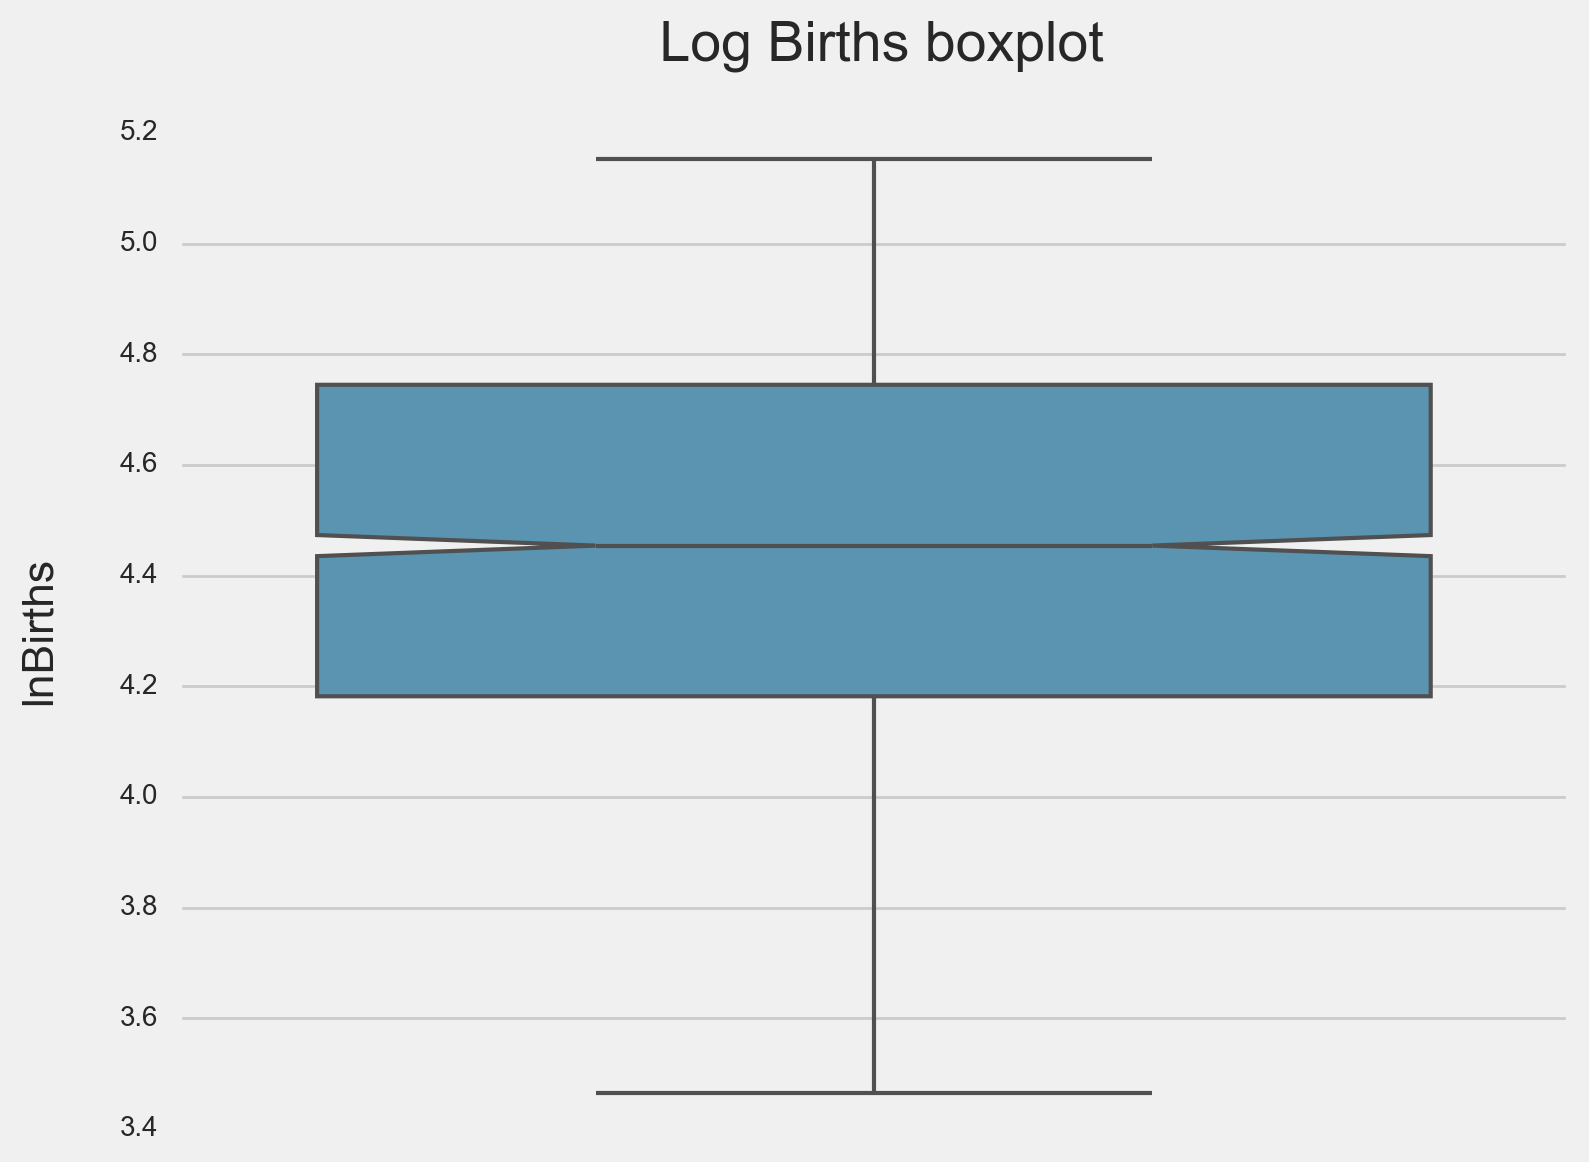

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.lnBirths, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('lnBirths\n', fontsize=16)
ax.set_title(' Log Births boxplot\n', fontsize=20)

plt.show()

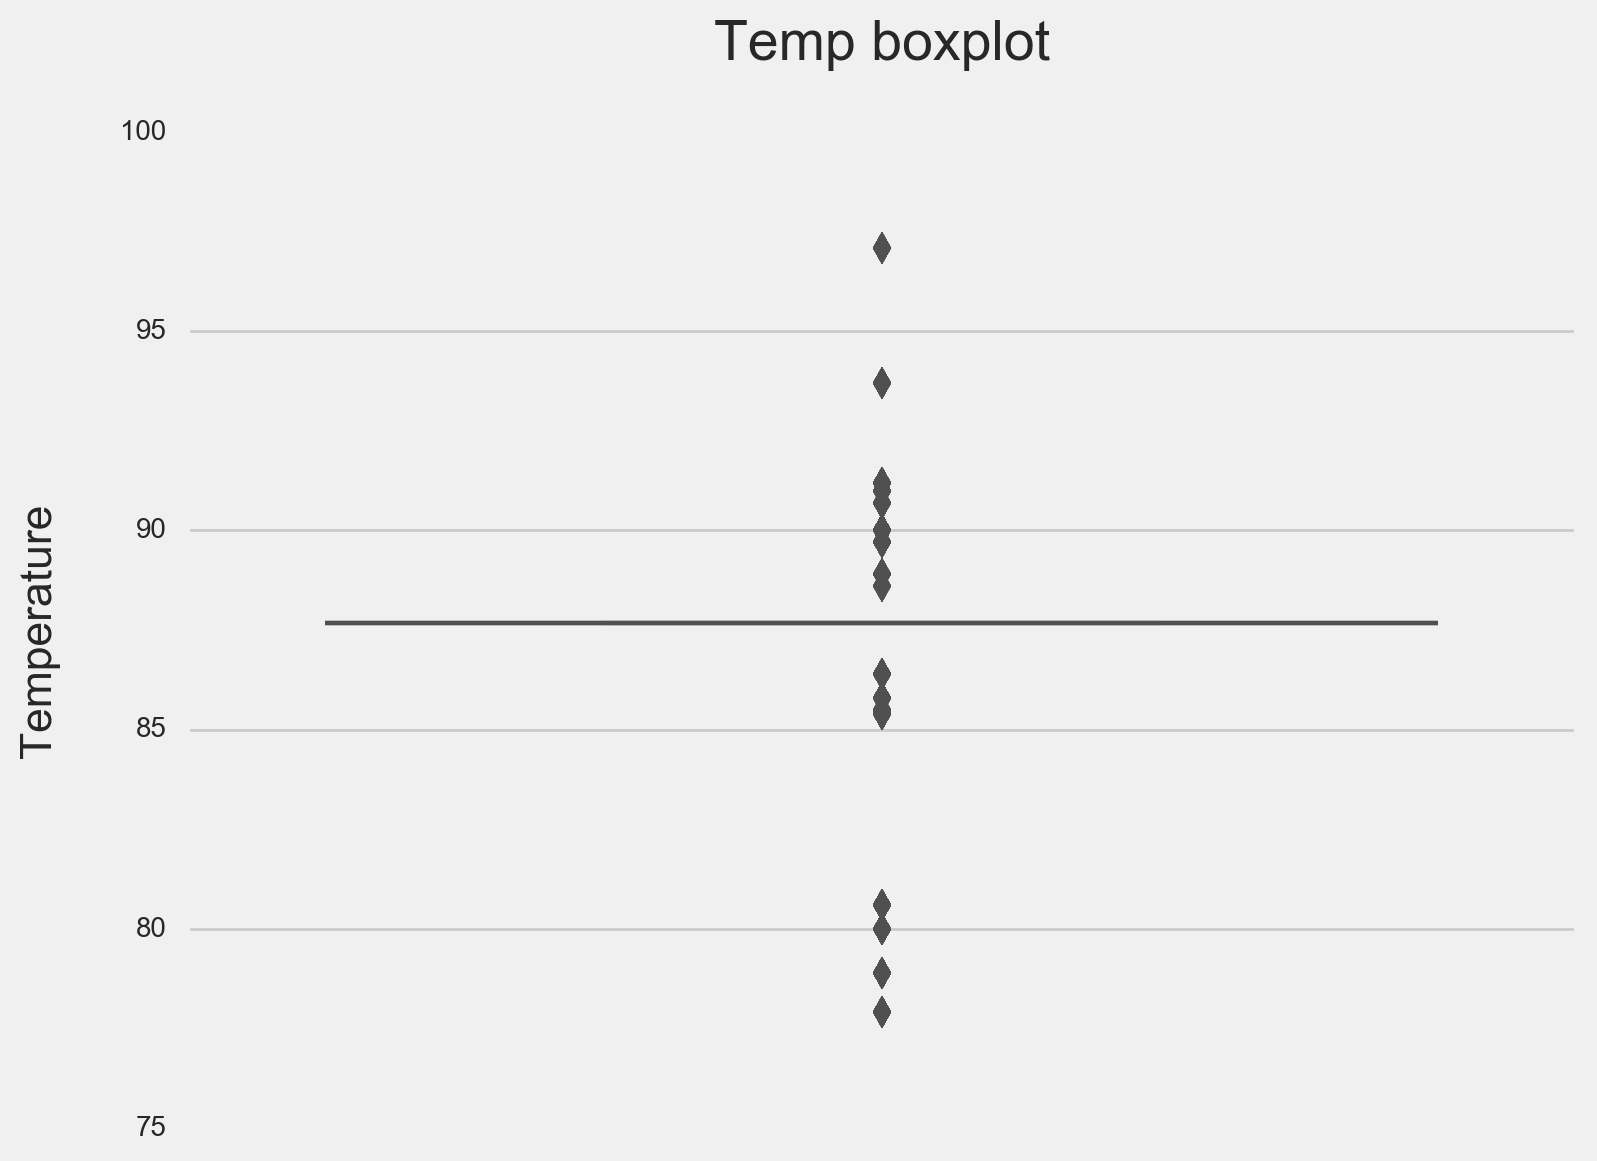

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.maxT, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Temperature\n', fontsize=16)
ax.set_title('Temp boxplot\n', fontsize=20)

plt.show()
#There appears to have outliers here. This could be because majority of the missing temperature information was replaced by mean. 
#Dhaka, Bangladesh does not have good data for their monthly average temperature and it was noticed that they obtain termperature
#information sporadically. This most of the missing values were replaced by mean. Temperatures cannot be logged. 

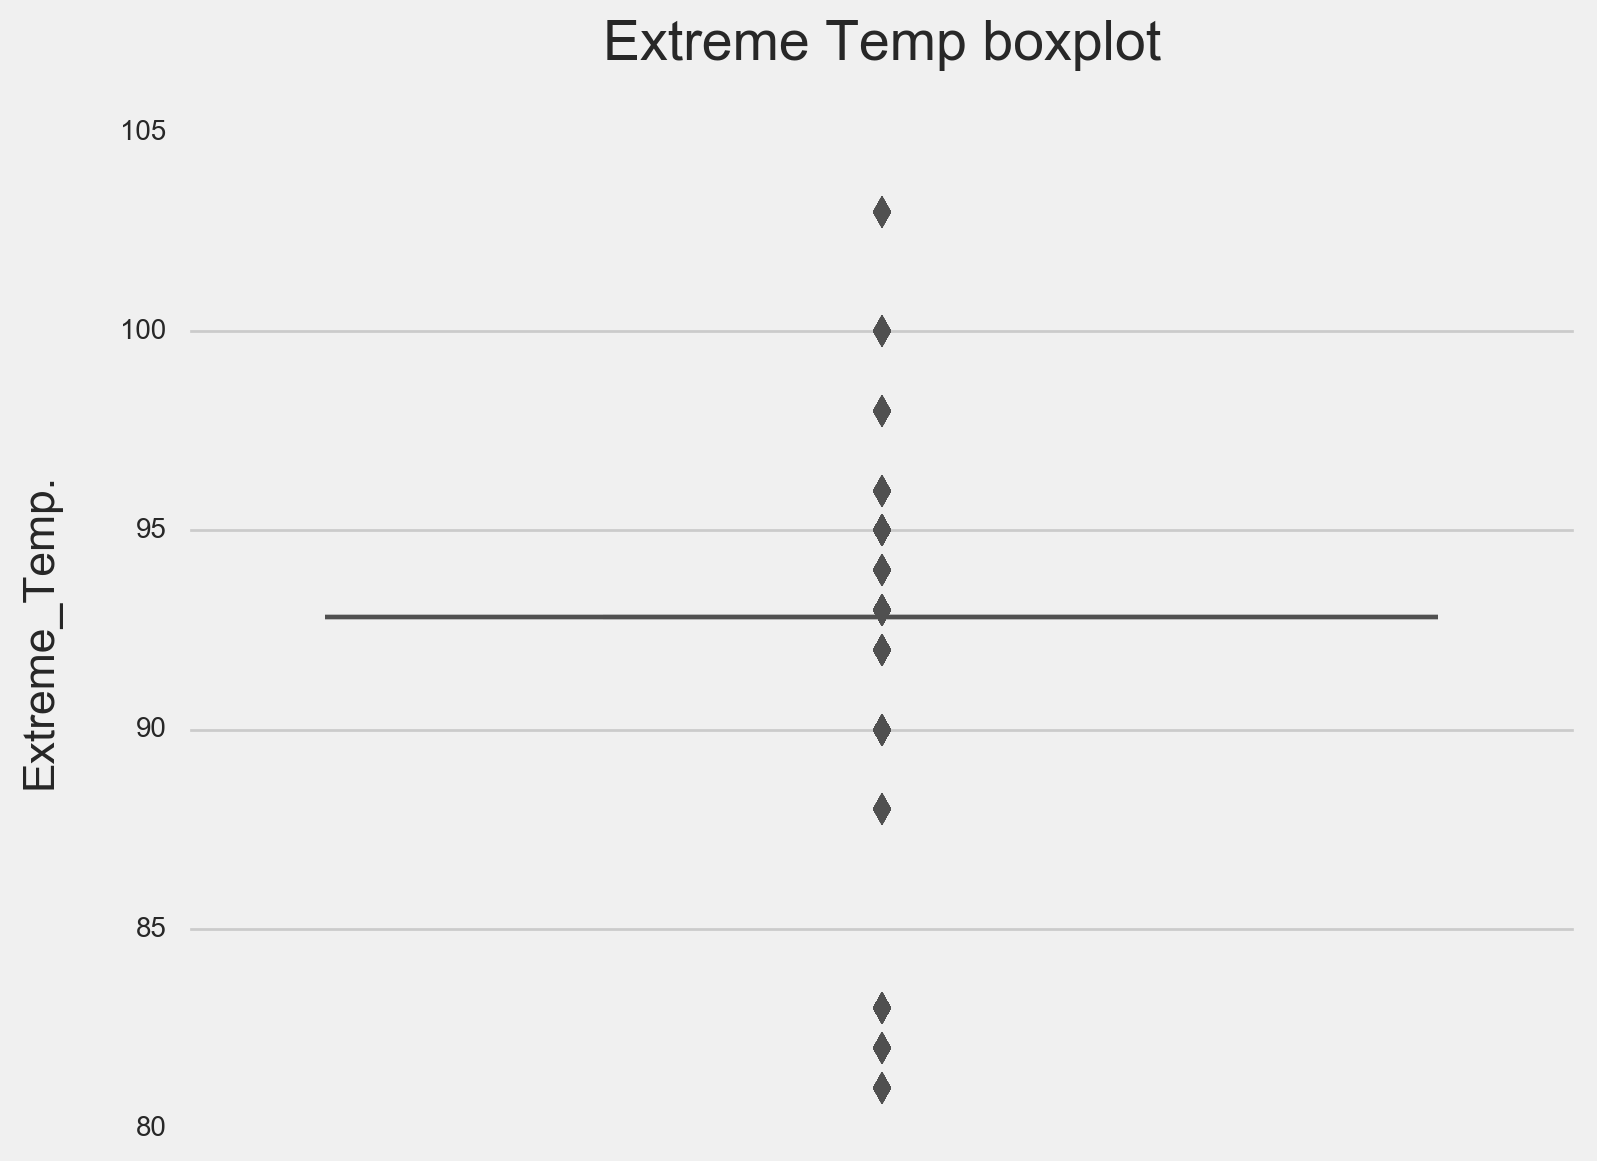

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.extremeT, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Extreme_Temp.\n', fontsize=16)
ax.set_title('Extreme Temp boxplot\n', fontsize=20)

plt.show()
#There appears to have outliers here. This could be because majority of the missing temperature information was replaced by mean. 
#Dhaka, Bangladesh does not have good data for their monthly average temperature and it was noticed that they obtain termperature
#information sporadically. This most of the missing values were replaced by mean. Temperatures cannot be logged. 

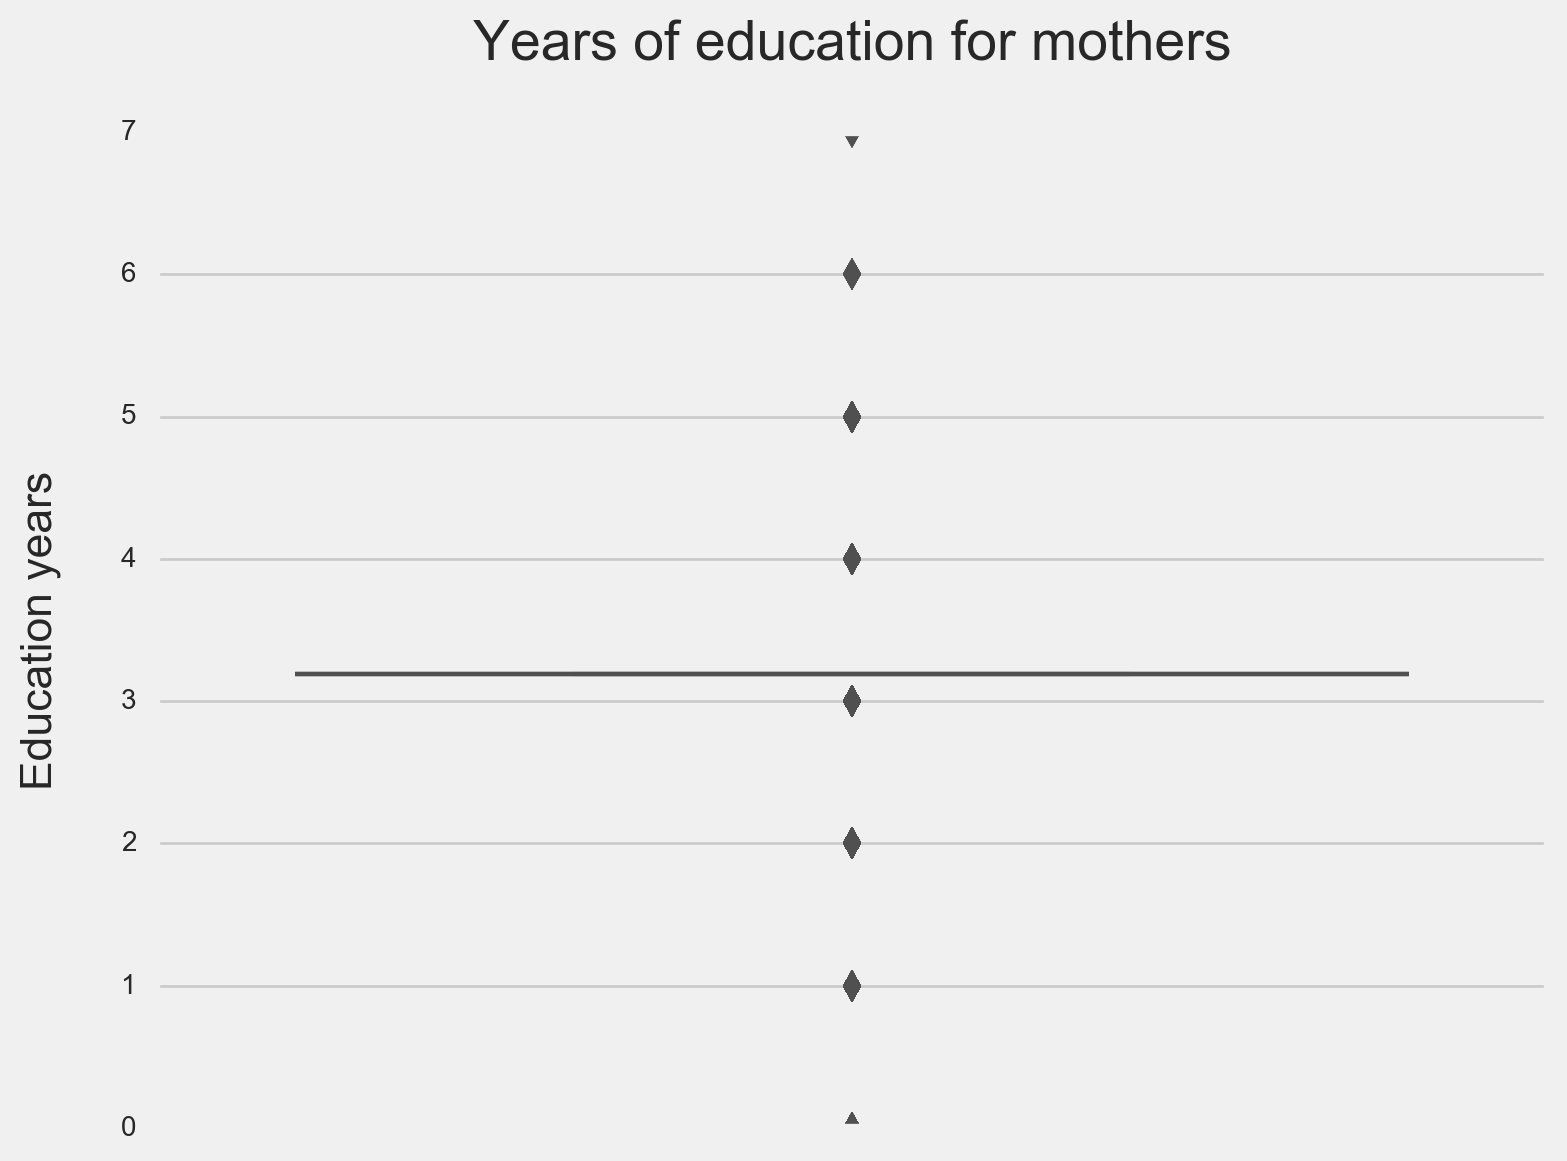

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.yrsofedu, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Education years\n', fontsize=16)
ax.set_title('Years of education for mothers\n', fontsize=20)

plt.show()
#Outliers are present this is because some respondents failed to answer this question accurately. Missing values were replaced with means.

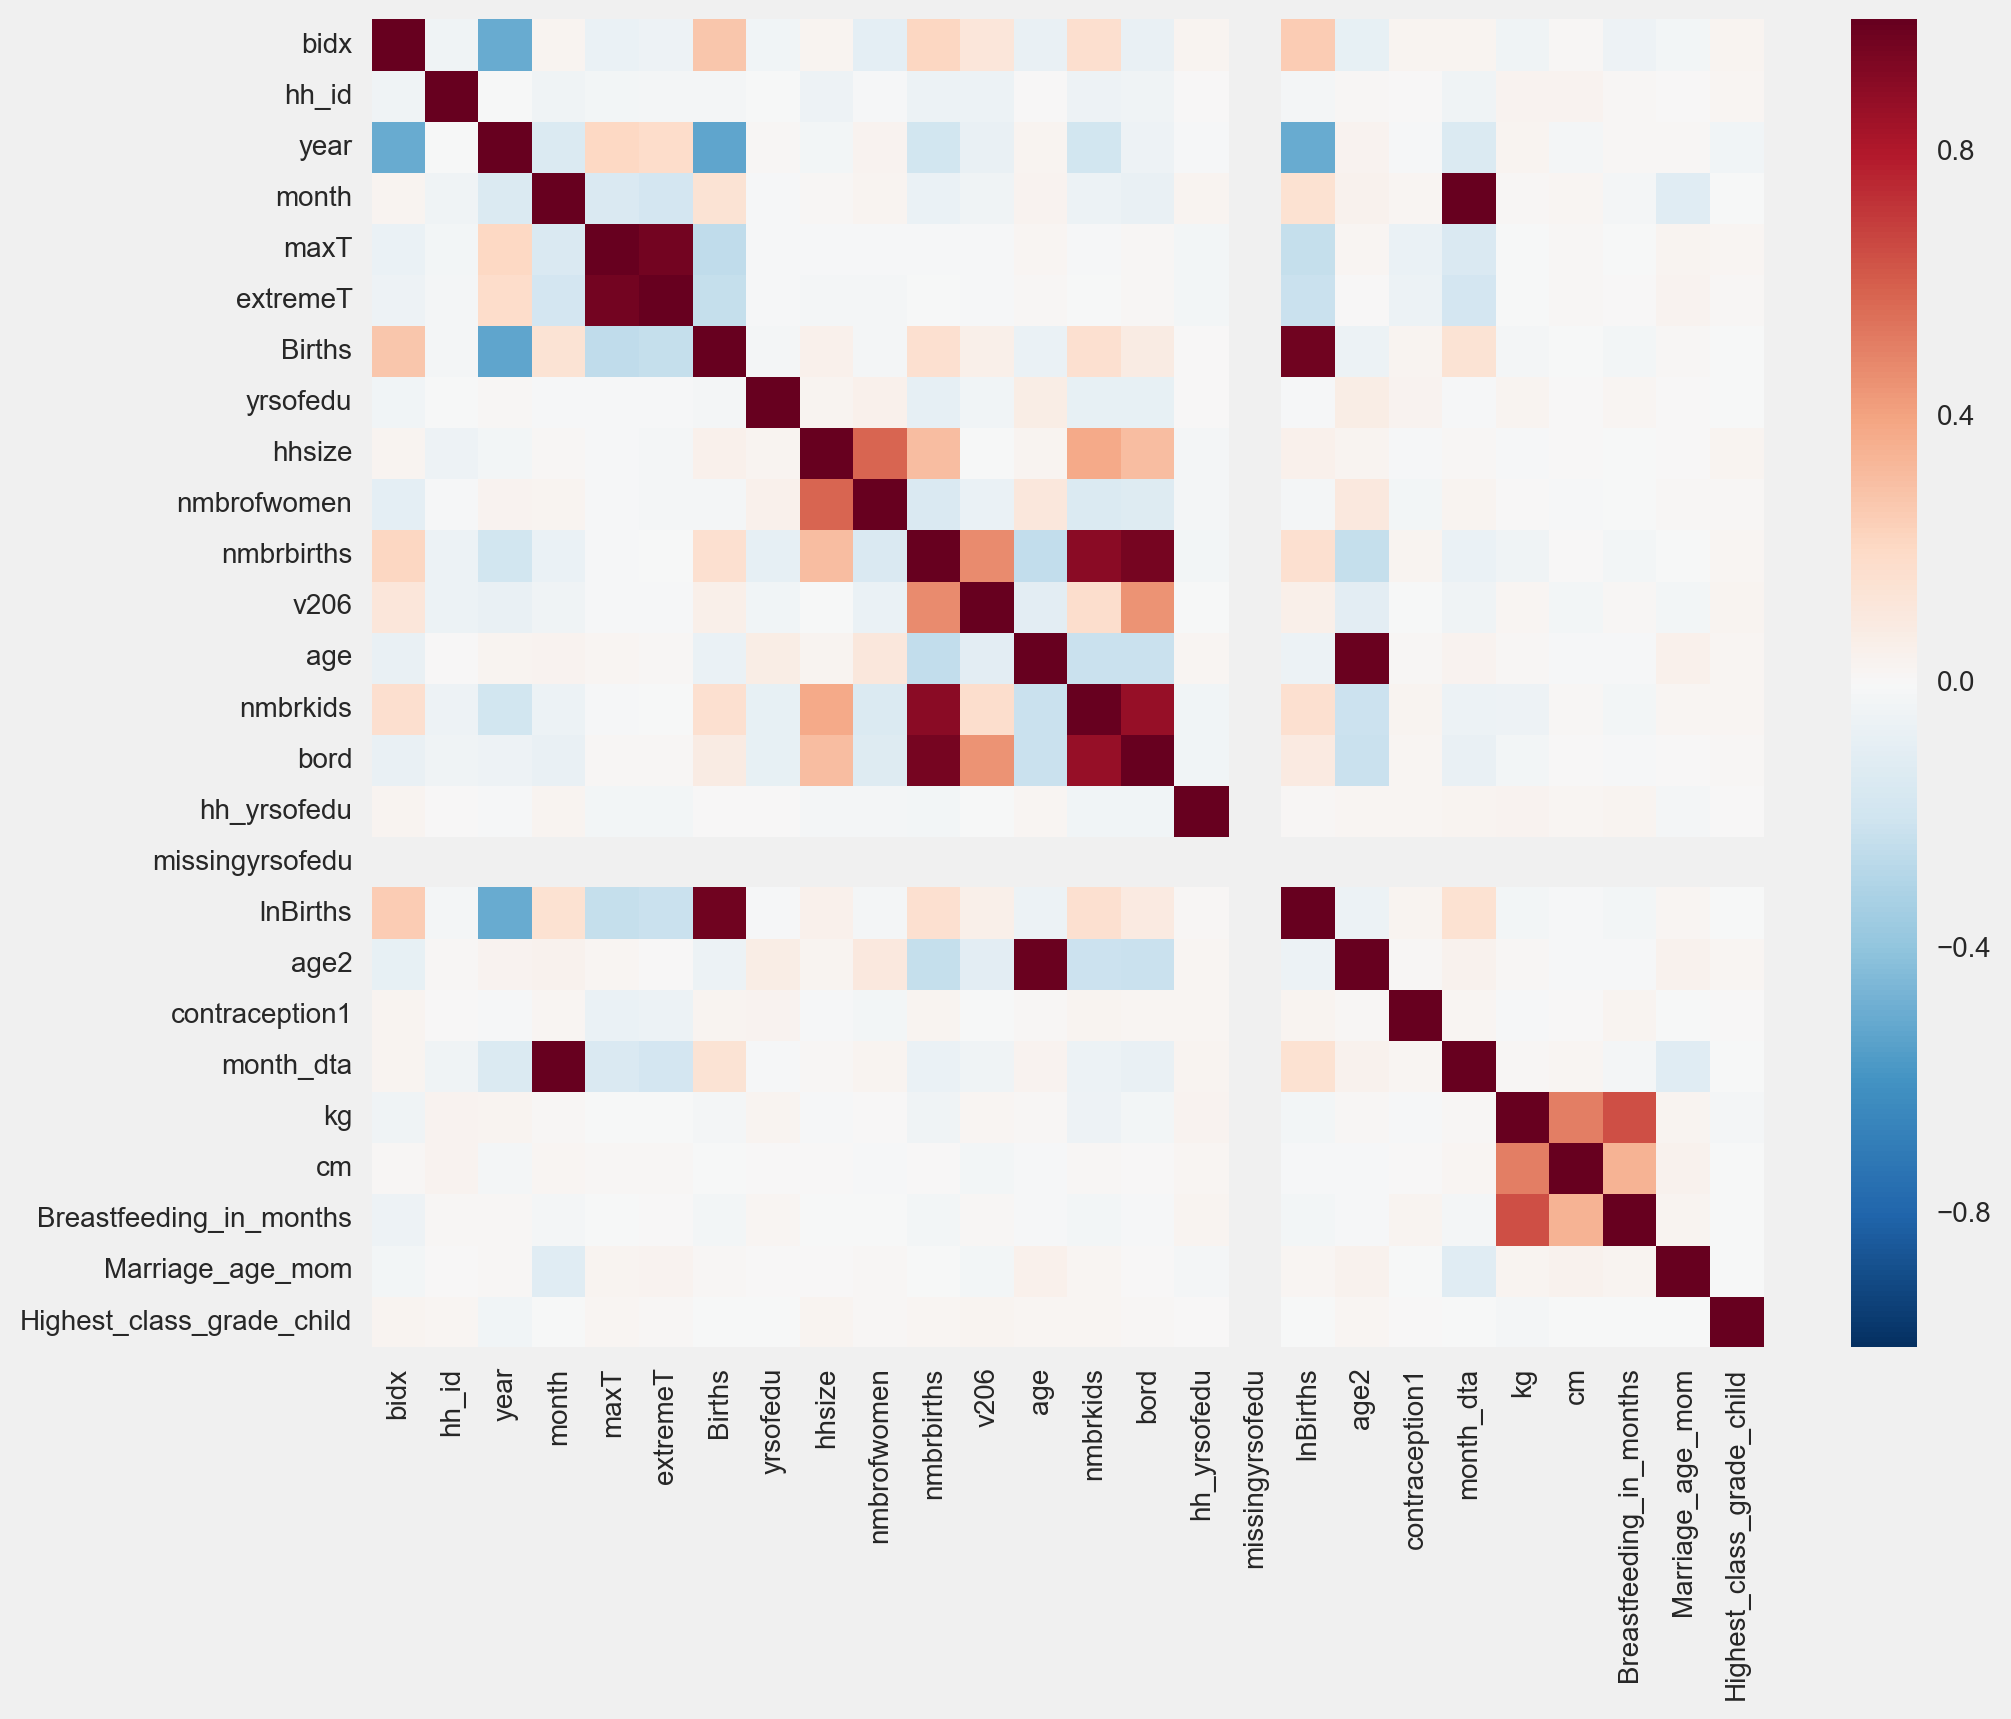

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df.corr(), ax=ax)
plt.show()
#Heatmap shows no correlation between birth rate and maxT but there is a negative correlation between extreme temp & birth rate. 

In [15]:
df.corr()

,bidx,hh_id,year,month,maxT,extremeT,Births,yrsofedu,hhsize,nmbrofwomen,...,missingyrsofedu,lnBirths,age2,contraception1,month_dta,kg,cm,Breastfeeding_in_months,Marriage_age_mom,Highest_class_grade_child
bidx,1.000000,-0.042925,-0.502600,0.026245,-0.069162,-0.051416,0.275472,-0.034549,0.028570,-0.099314,...,NaN,0.257052,-0.078691,0.023654,0.026245,-0.042133,0.011409,-0.051490,-0.030991,0.028780
hh_id,-0.042925,1.000000,-0.001901,-0.042609,-0.024446,-0.017797,-0.016805,-0.003958,-0.053644,-0.011836,...,NaN,-0.018340,0.008925,0.001358,-0.042609,0.033272,0.038430,0.007832,0.001651,0.022001
year,-0.502600,-0.001901,1.000000,-0.141153,0.204290,0.180098,-0.528038,0.010443,-0.026111,0.038228,...,NaN,-0.501910,0.032590,-0.015594,-0.141153,0.026391,-0.020571,0.011874,0.013093,-0.033520
month,0.026245,-0.042609,-0.141153,1.000000,-0.155808,-0.187423,0.147220,-0.013735,0.009663,0.023885,...,NaN,0.154405,0.040603,0.016478,1.000000,0.009513,0.018363,-0.021175,-0.117358,-0.003773
maxT,-0.069162,-0.024446,0.204290,-0.155808,1.000000,0.963301,-0.250380,-0.008752,-0.014895,-0.014394,...,NaN,-0.237172,0.015634,-0.062567,-0.155808,-0.007362,0.011624,-0.003273,0.028954,0.019068
extremeT,-0.051416,-0.017797,0.180098,-0.187423,0.963301,1.000000,-0.238389,-0.008054,-0.017728,-0.022777,...,NaN,-0.222588,0.006192,-0.057094,-0.187423,-0.004728,0.015307,0.002014,0.033463,0.015346
Births,0.275472,-0.016805,-0.528038,0.147220,-0.250380,-0.238389,1.000000,-0.016248,0.047765,-0.016516,...,NaN,0.975782,-0.060169,0.023835,0.147220,-0.019293,-0.003416,-0.026150,0.010225,-0.007802
yrsofedu,-0.034549,-0.003958,0.010443,-0.013735,-0.008752,-0.008054,-0.016248,1.000000,0.029110,0.047661,...,NaN,-0.015489,0.074172,0.037484,-0.013735,0.029933,0.007545,0.021953,0.007072,-0.003653
hhsize,0.028570,-0.053644,-0.026111,0.009663,-0.014895,-0.017728,0.047765,0.029110,1.000000,0.583986,...,NaN,0.048604,0.026592,-0.011081,0.009663,-0.010204,0.002448,-0.007057,0.002818,0.028678
nmbrofwomen,-0.099314,-0.011836,0.038228,0.023885,-0.014394,-0.022777,-0.016516,0.047661,0.583986,1.000000,...,NaN,-0.015880,0.108513,-0.031115,0.023885,0.006563,-0.009704,-0.007124,0.012708,0.010594


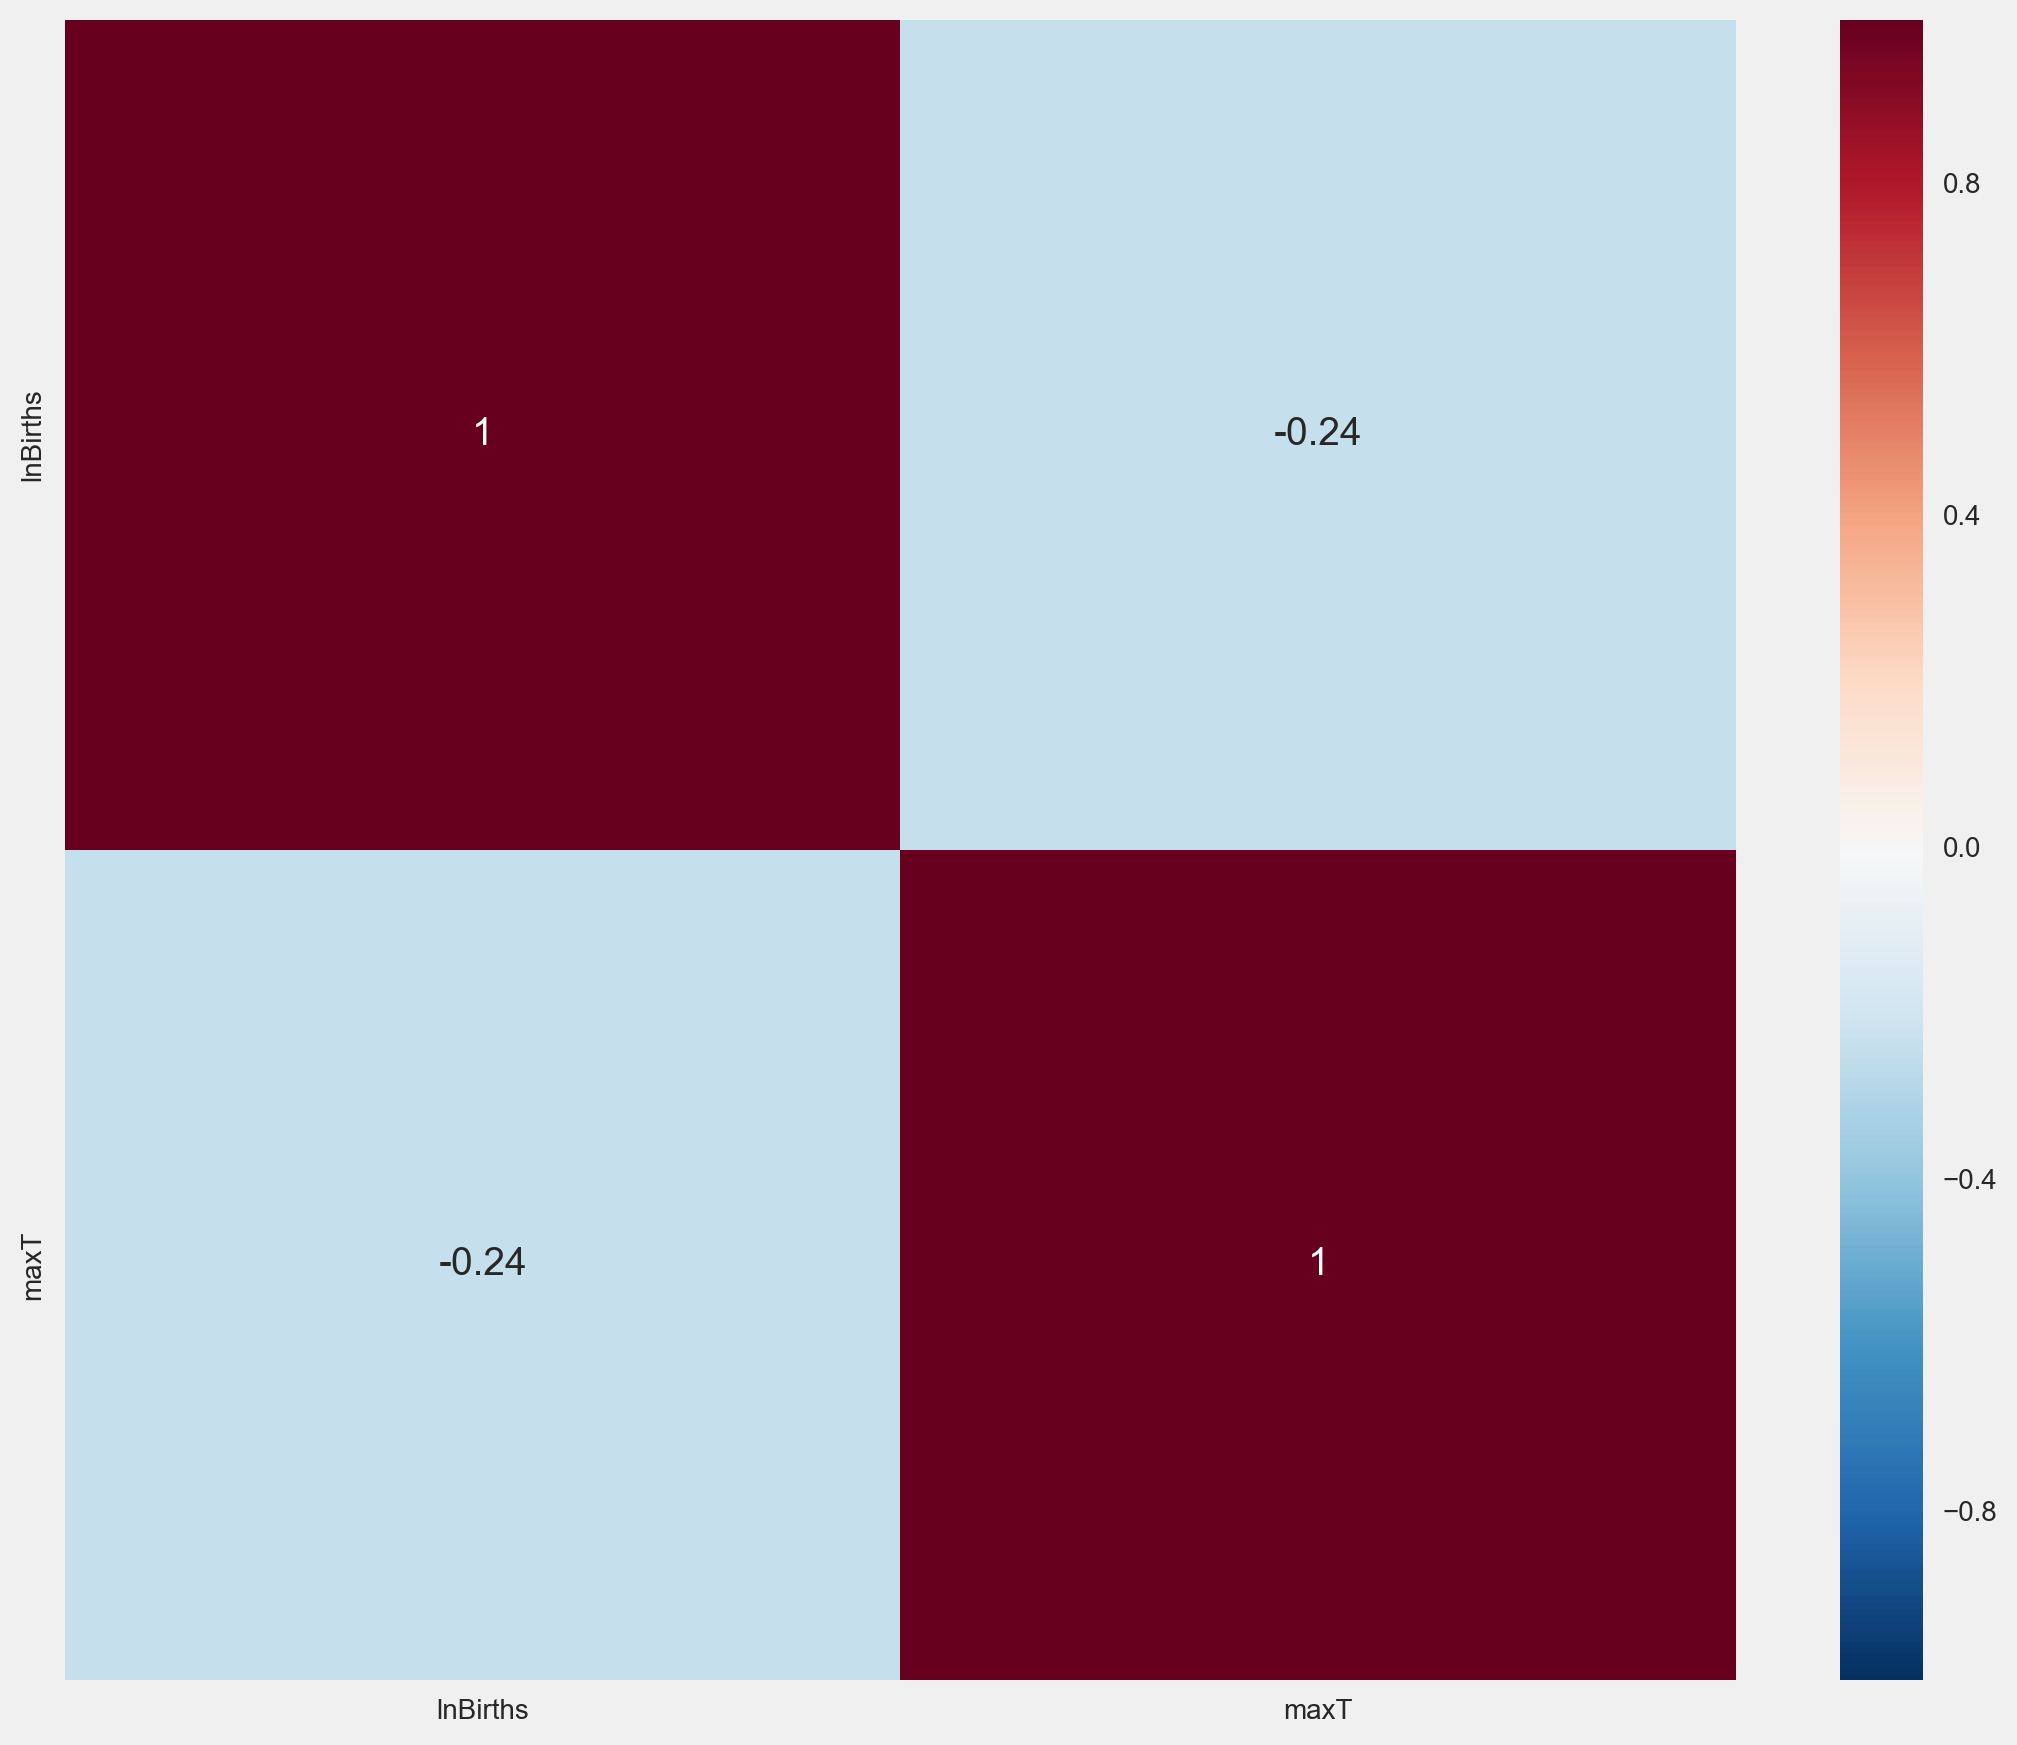

In [16]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.heatmap(df[['lnBirths', 'maxT']].corr(),annot=True, ax=ax)
plt.show()
#There is a negative correlation between lnBirths and maxT. This was not shown on heat map. 

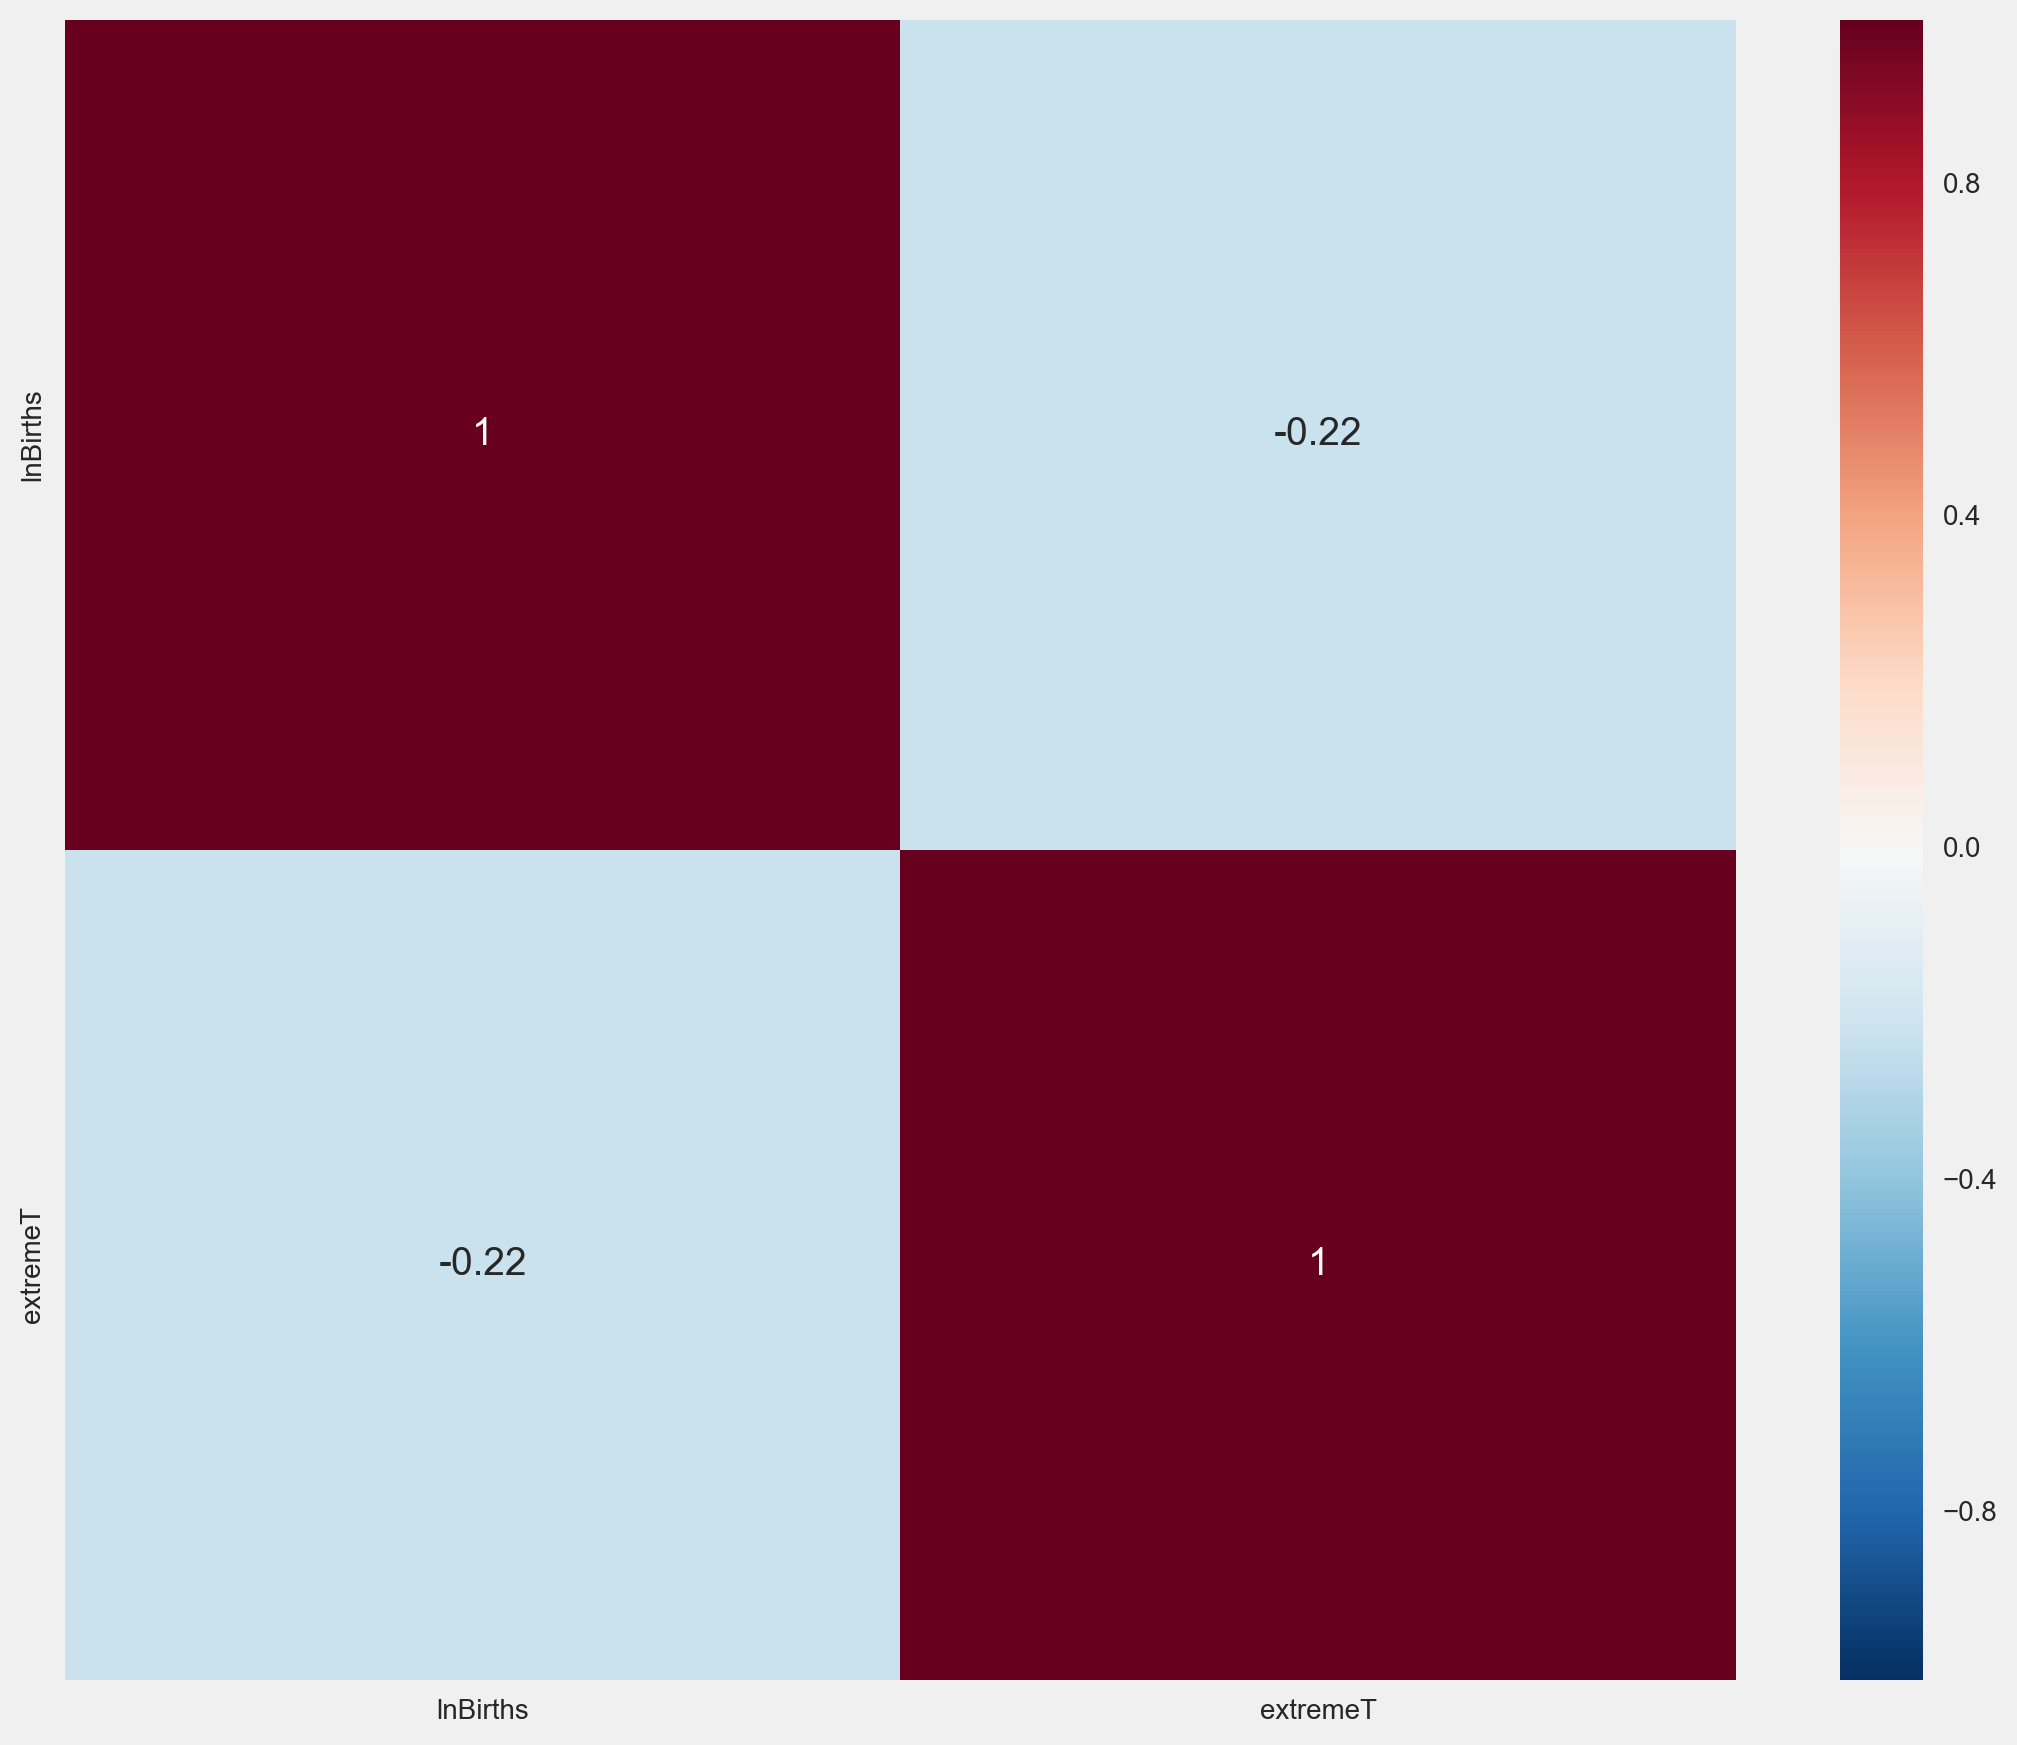

In [17]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.heatmap(df[['lnBirths', 'extremeT']].corr(),annot=True, ax=ax)
plt.show()
#This map is consistent with the master heat map

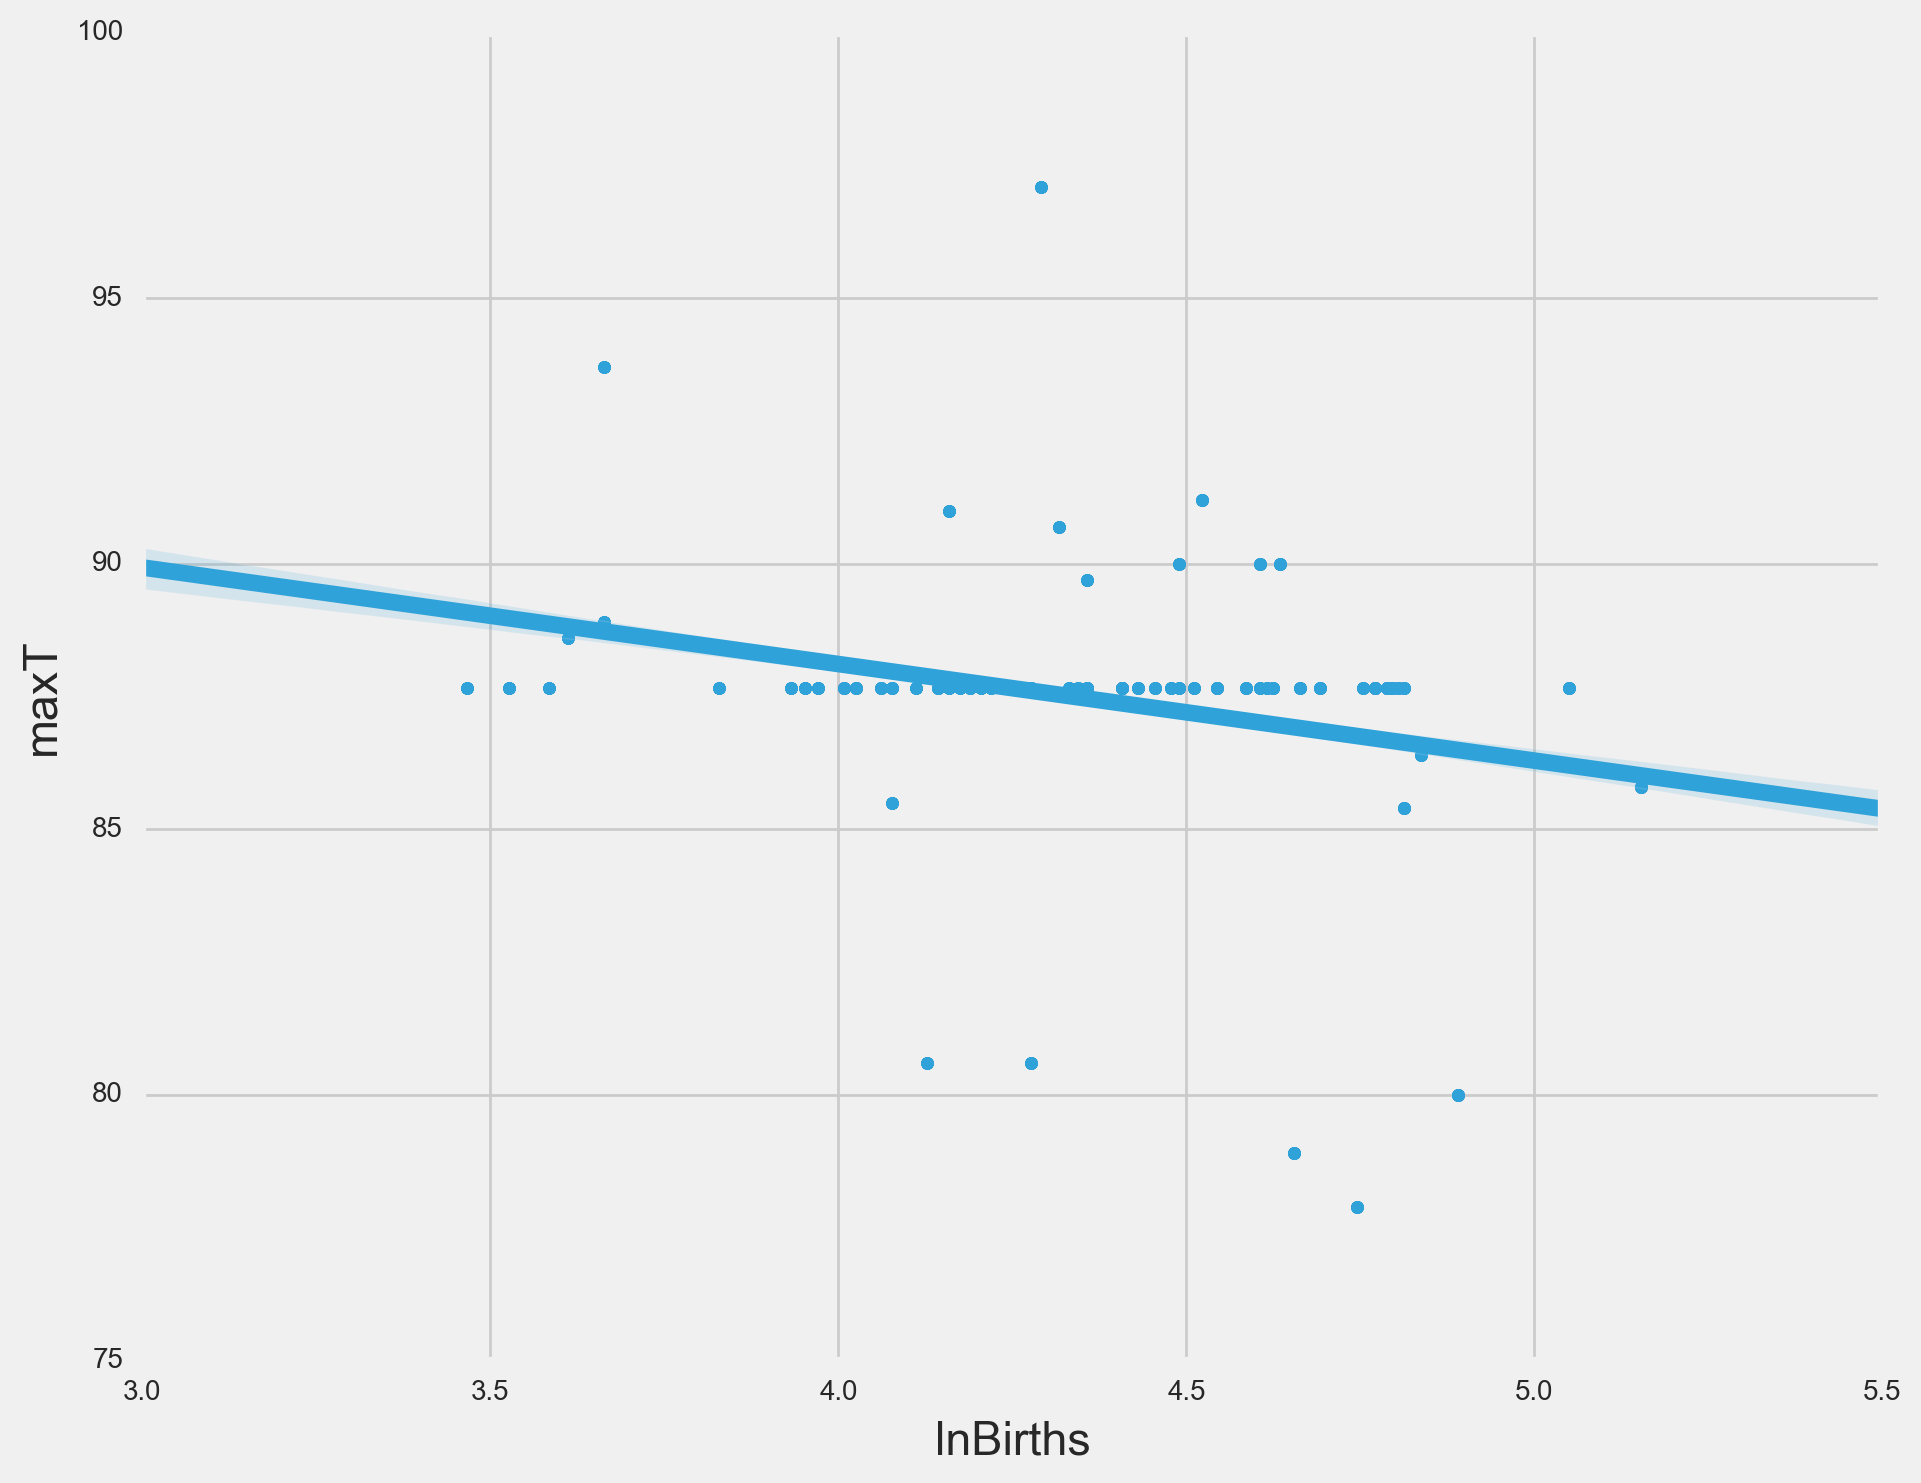

In [18]:
fig = plt.figure(figsize=(10,8))
sns.regplot(df['lnBirths'], df['maxT'], data=df)
plt.show()
#Shows decrease in logbirths as the temperature increases

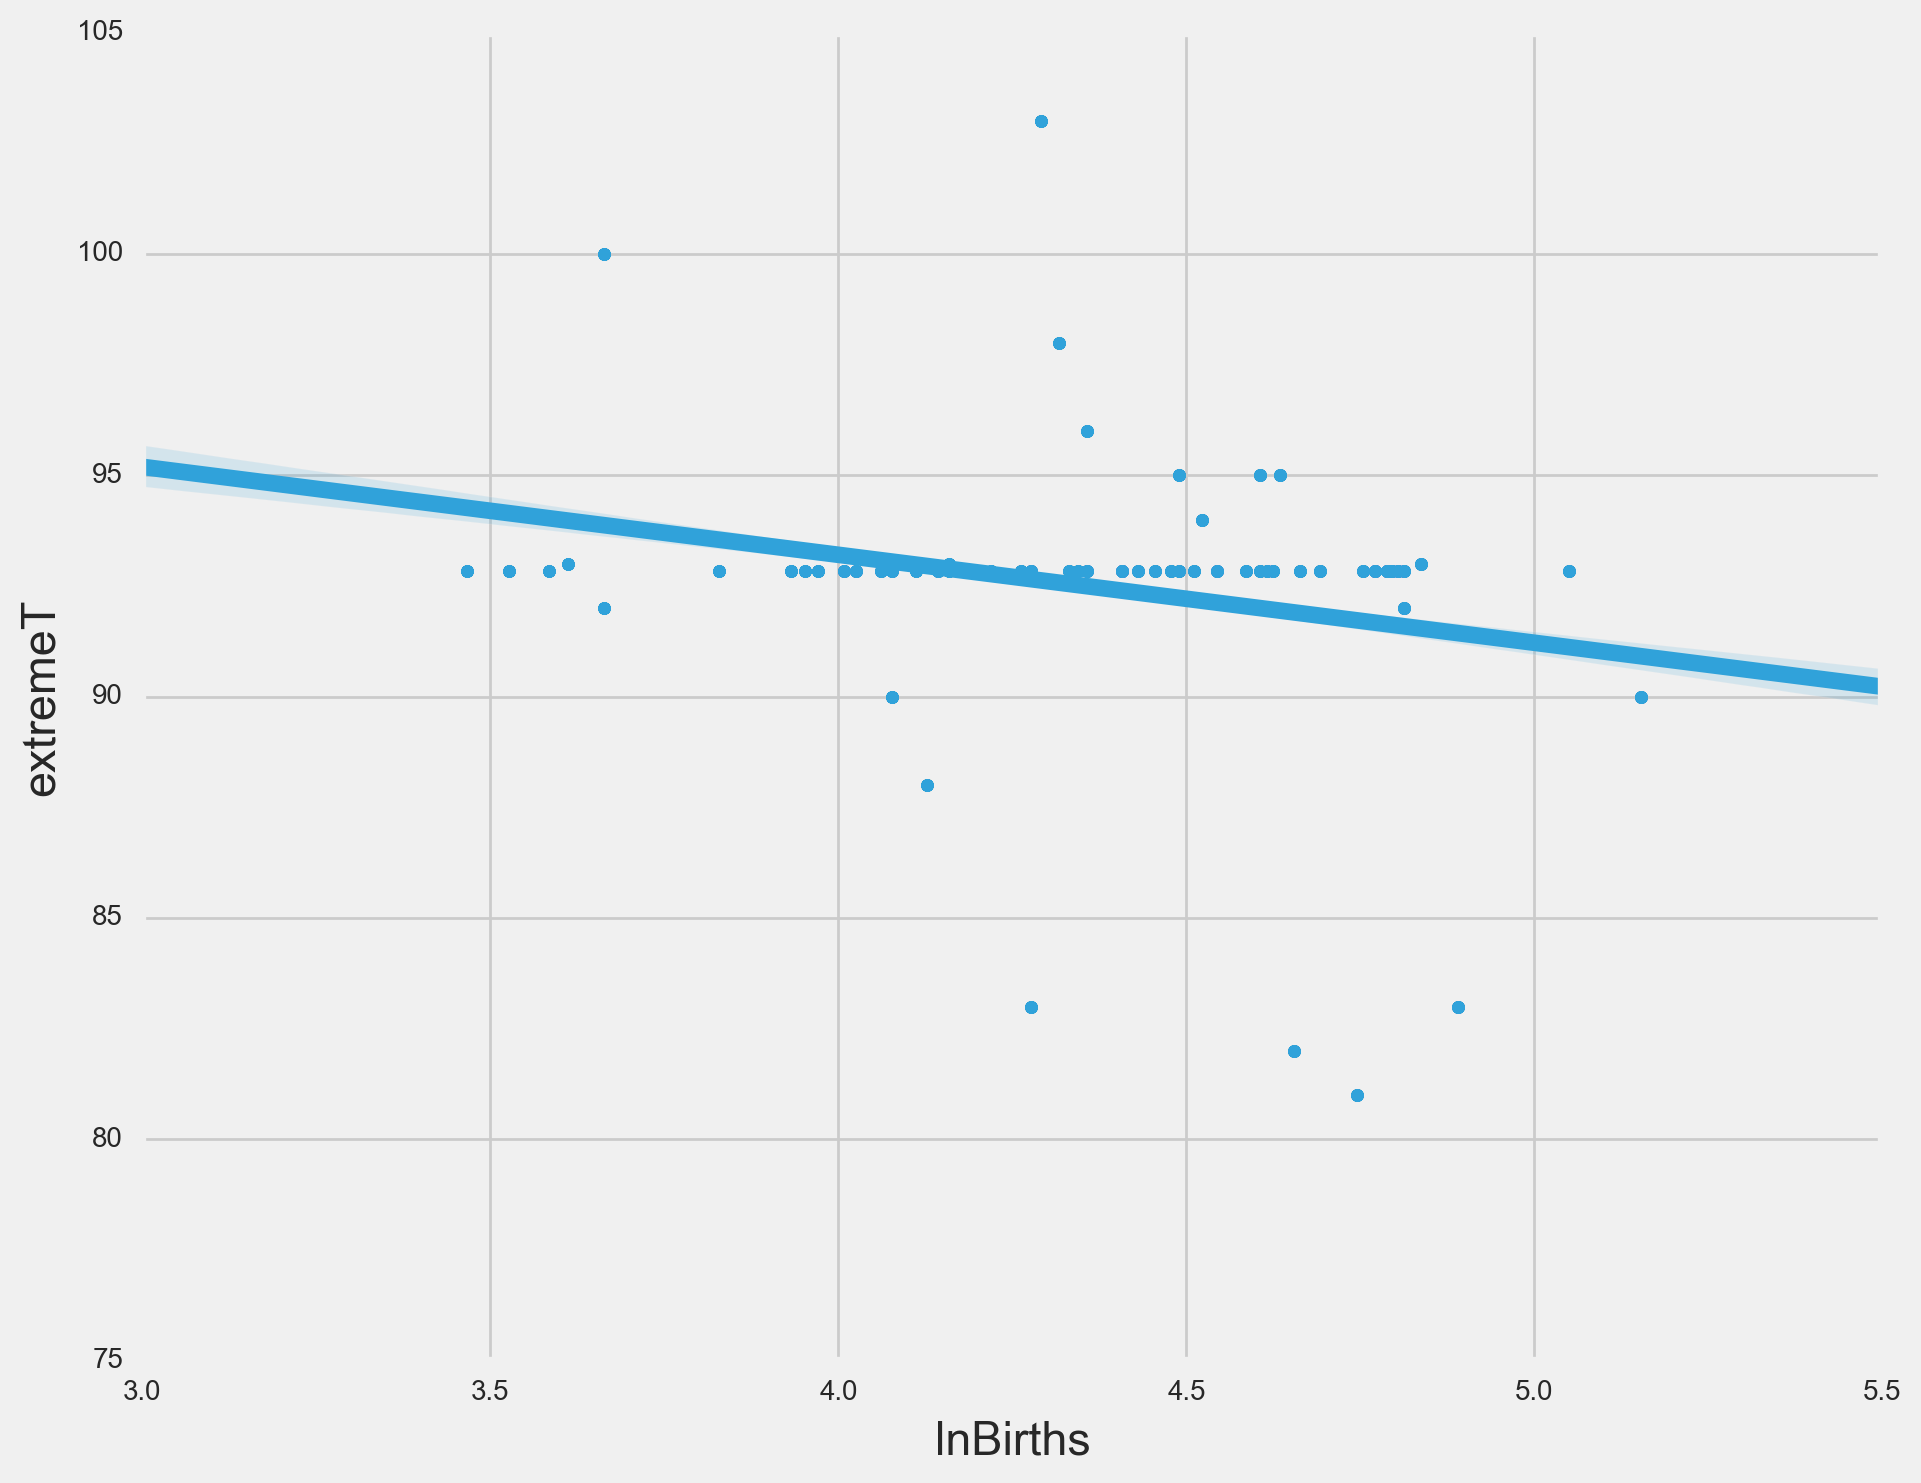

In [19]:
fig = plt.figure(figsize=(10,8))
sns.regplot(df['lnBirths'], df['extremeT'], data=df)
plt.show()
#Shows decrease in logbirths as the temperature increases and it is consistent with maxT. 

In [20]:
df.describe().T #description statistics

,count,mean,std,min,25%,50%,75%,max
bidx,2147.0,1.404751,0.626858,1.000000,1.000000,1.000000,2.000000,4.000000
hh_id,2147.0,139.108989,118.638621,1.000000,46.000000,98.000000,210.000000,555.000000
year,2147.0,93.221705,1.867522,90.000000,92.000000,93.000000,95.000000,96.000000
month,2147.0,7.035398,3.717250,1.000000,3.000000,8.000000,10.000000,12.000000
maxT,2147.0,87.324446,2.685454,77.900000,87.667300,87.667300,87.667300,97.100000
extremeT,2147.0,92.341458,3.127576,81.000000,92.836400,92.836400,92.836400,103.000000
Births,2147.0,89.357243,29.741735,32.000000,65.500000,86.000000,115.000000,173.000000
yrsofedu,2147.0,3.193470,1.023272,0.000000,3.193470,3.193470,3.193470,7.000000
hhsize,2147.0,6.087564,2.443351,2.000000,4.000000,6.000000,7.000000,16.000000
nmbrofwomen,2147.0,1.241733,0.554378,1.000000,1.000000,1.000000,1.000000,5.000000


In [21]:
#Here I am trying to see a relationship between height, weight and duration of breastfeeding. 
df.groupby(['month', 'kg', "cm"], sort=True)[['Breastfeeding_in_months']].mean().sort_values(by=['Breastfeeding_in_months'], ascending=False).reset_index()

,month,kg,cm,Breastfeeding_in_months
0,9,59.0,115.000000,59.0
1,11,59.0,119.000000,59.0
2,9,58.0,119.000000,58.0
3,7,58.0,99.000000,58.0
4,9,58.0,122.000000,58.0
5,9,57.0,117.000000,57.0
6,2,57.0,118.000000,57.0
7,2,57.0,90.000000,57.0
8,1,57.0,115.000000,57.0
9,9,55.0,126.000000,55.0


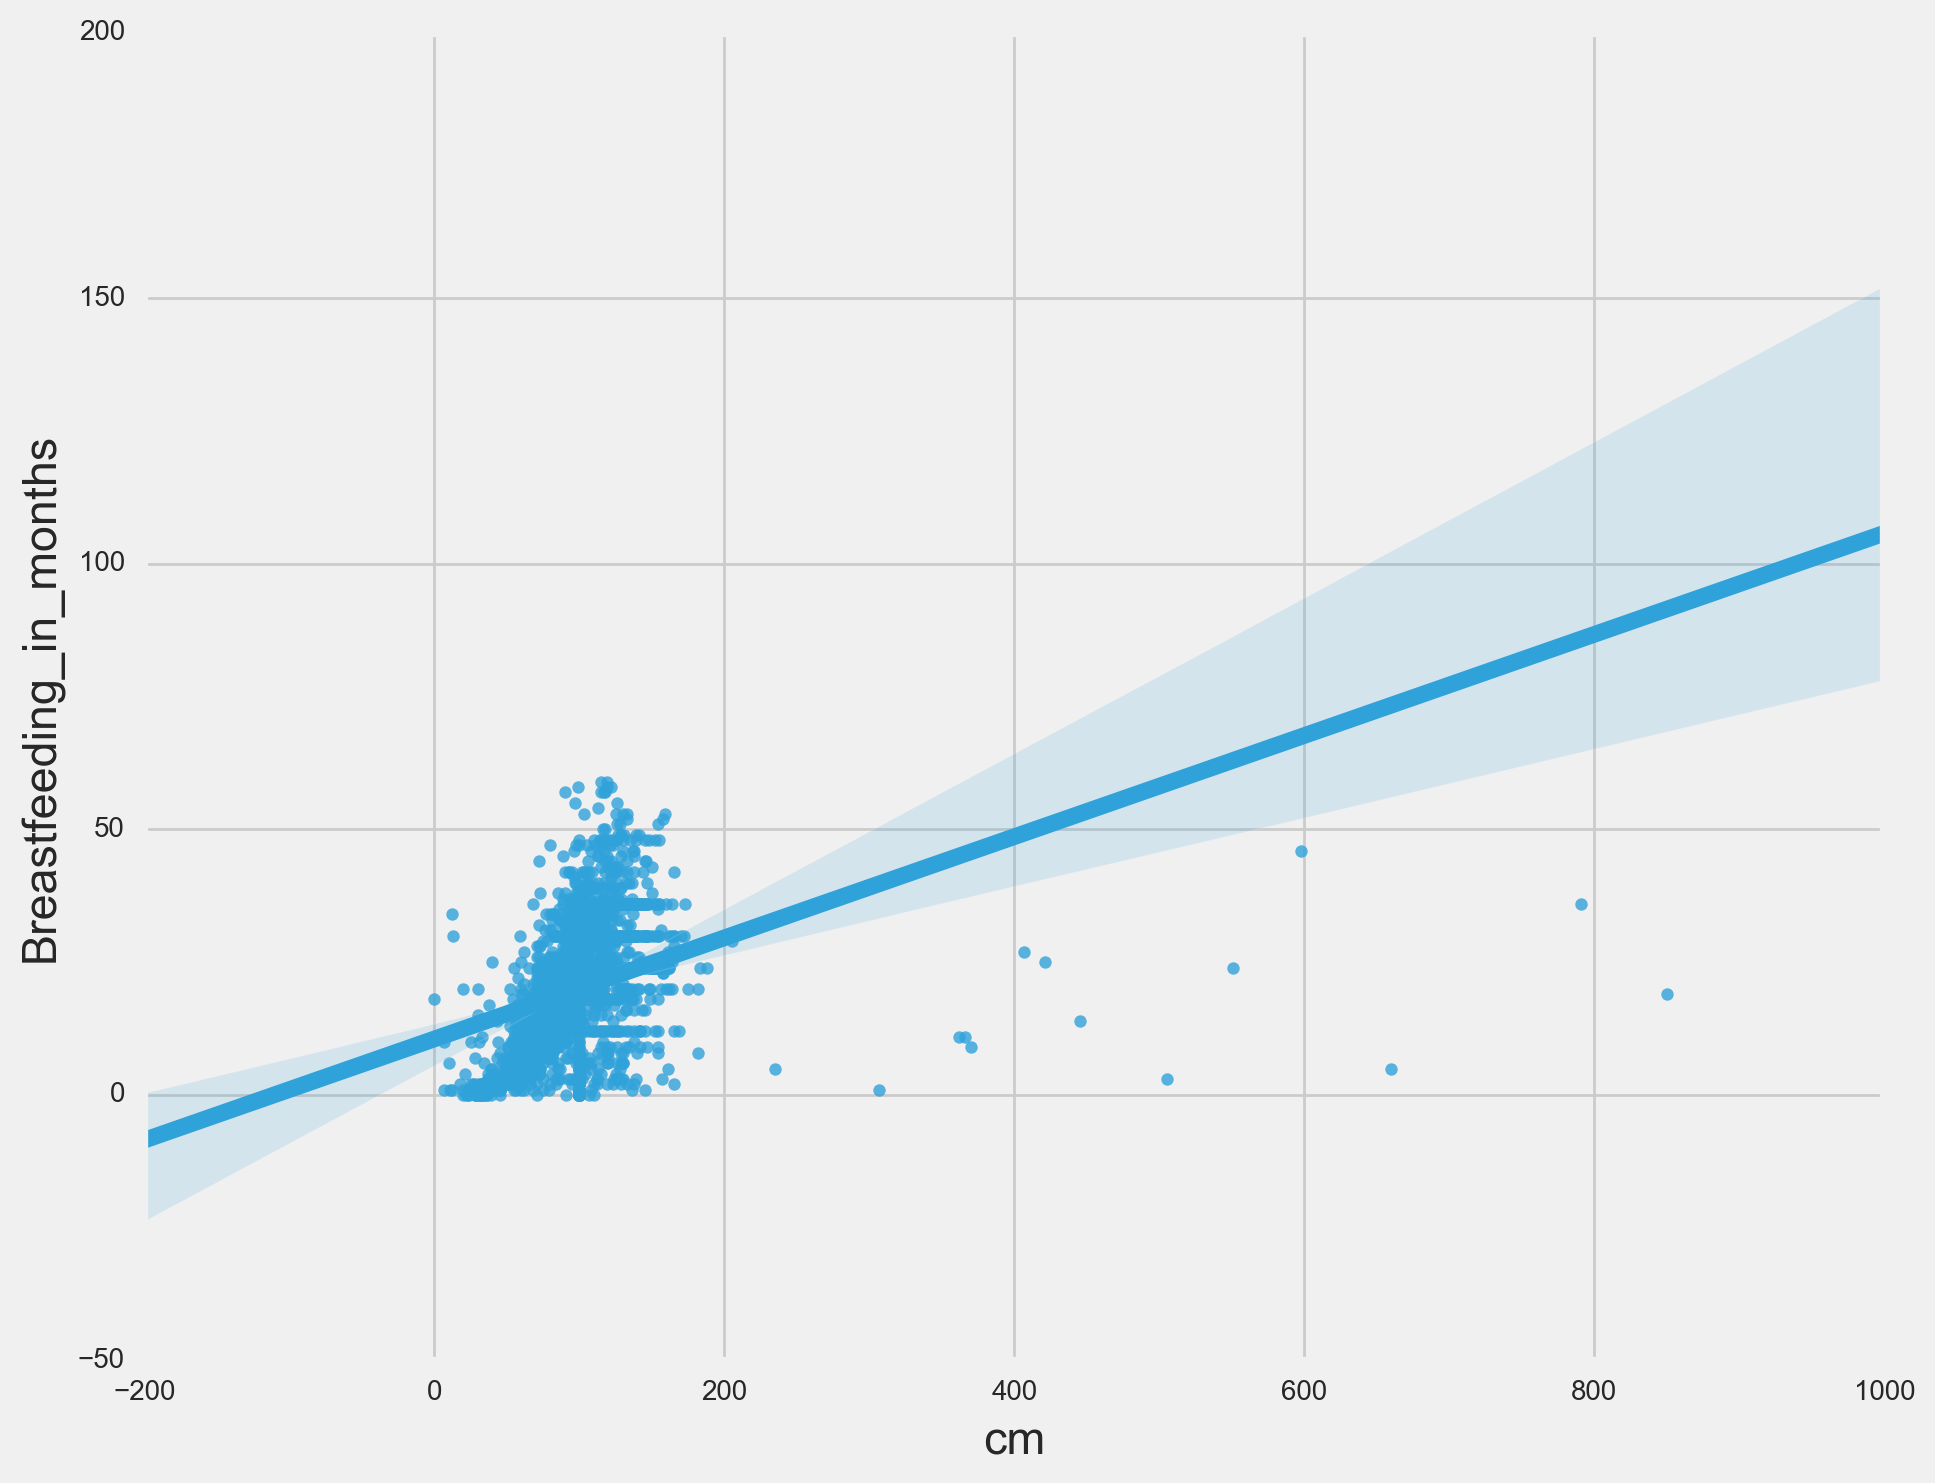

In [22]:
#there are clearly some outliers here for height but this visual attempts to show the relationship between breastfeeding and height. 
fig = plt.figure(figsize=(10,8))
sns.regplot(df['cm'], df['Breastfeeding_in_months'], data=df)
plt.show()

In [23]:
#Seems like there are more births in October-December compared to any other months. 
#The coolest months in Bangladesh are Jan-Feb and October-December. Birth rate surges from at the end of the year and
#lower during the hottest months which is from March-August. It is obviously too early to draw an inference from EDA. 
df.groupby(['month'], sort=True)[['Births']].count().sort_values(by=['Births'], ascending=False).reset_index()

,month,Births
0,11,281
1,12,237
2,10,234
3,9,215
4,1,203
5,2,180
6,3,161
7,8,145
8,5,139
9,7,120


In [24]:
df1= df[(df.month > 10)] 
df1.head(5)
#Data will be merged. Sorting out birth months >10 to calculate the conception month

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
4,2,453,93,11,87.6673,92.8364,78,rural,no education,3.19347,...,injectio,no education,11,13.0,76.0,female,13.0,no,11.0,1.00000
13,1,38,95,11,87.6673,92.8364,82,rural,no education,3.19347,...,not usin,no education,11,30.0,110.0,male,30.0,no,11.0,4.92692
14,3,38,91,11,87.6673,92.8364,122,rural,no education,3.19347,...,not usin,no education,11,37.0,138.0,male,30.0,no,13.0,5.00000
15,3,67,90,11,85.8000,90.0000,173,rural,no education,3.19347,...,not usin,no education,11,2.0,44.0,male,2.0,no,19.0,4.92692
16,4,120,90,11,85.8000,90.0000,173,rural,primary,3.00000,...,not usin,primary,11,18.0,81.0,male,18.0,yes,8.0,9.00000


In [25]:
df2= df[(df.month < 10)] 
df2.head(5)
#Data will be merged. Sorting out birth months <10 to calculate the conception month

,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,b_control,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
1,1,82,95,8,87.6673,92.8364,59,rural,no education,3.19347,...,condom,no education,8,44.0,146.0,female,44.0,yes,14.0,4.92692
2,1,134,96,2,85.5000,90.0000,59,rural,primary,5.00000,...,female s,primary,2,39.0,119.0,female,24.0,yes,25.0,4.92692
3,1,4,96,2,85.5000,90.0000,59,rural,no education,3.19347,...,female s,no education,2,34.0,95.0,female,34.0,no,14.0,4.92692
5,2,120,93,2,87.6673,92.8364,120,rural,primary,3.00000,...,injectio,primary,2,55.0,131.0,female,24.0,no,12.0,6.00000
6,1,8,92,3,87.6673,92.8364,91,rural,no education,3.19347,...,injectio,no education,3,26.0,125.0,female,26.0,yes,14.0,4.92692


In [26]:
df2['month1'] = df2['month']+12
df2.head(5)
#obtaining correct month so conception month can be calculated. This is under assumption that all pregnancies are full term

/Users/KiraEvsanaa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,month1
1,1,82,95,8,87.6673,92.8364,59,rural,no education,3.19347,...,no education,8,44.0,146.0,female,44.0,yes,14.0,4.92692,20
2,1,134,96,2,85.5000,90.0000,59,rural,primary,5.00000,...,primary,2,39.0,119.0,female,24.0,yes,25.0,4.92692,14
3,1,4,96,2,85.5000,90.0000,59,rural,no education,3.19347,...,no education,2,34.0,95.0,female,34.0,no,14.0,4.92692,14
5,2,120,93,2,87.6673,92.8364,120,rural,primary,3.00000,...,primary,2,55.0,131.0,female,24.0,no,12.0,6.00000,14
6,1,8,92,3,87.6673,92.8364,91,rural,no education,3.19347,...,no education,3,26.0,125.0,female,26.0,yes,14.0,4.92692,15


In [27]:
#Assuming that all pregnancies were full term, I am creating new column called conception
df1['Conception'] = df1['month']-9
df1.head(5)

/Users/KiraEvsanaa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,Conception
4,2,453,93,11,87.6673,92.8364,78,rural,no education,3.19347,...,no education,11,13.0,76.0,female,13.0,no,11.0,1.00000,2
13,1,38,95,11,87.6673,92.8364,82,rural,no education,3.19347,...,no education,11,30.0,110.0,male,30.0,no,11.0,4.92692,2
14,3,38,91,11,87.6673,92.8364,122,rural,no education,3.19347,...,no education,11,37.0,138.0,male,30.0,no,13.0,5.00000,2
15,3,67,90,11,85.8000,90.0000,173,rural,no education,3.19347,...,no education,11,2.0,44.0,male,2.0,no,19.0,4.92692,2
16,4,120,90,11,85.8000,90.0000,173,rural,primary,3.00000,...,primary,11,18.0,81.0,male,18.0,yes,8.0,9.00000,2


In [28]:
df2['Conception'] = df2['month1']-9
df2.head(5)

/Users/KiraEvsanaa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,bidx,hh_id,year,month,maxT,extremeT,Births,household_location,education,yrsofedu,...,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,month1,Conception
1,1,82,95,8,87.6673,92.8364,59,rural,no education,3.19347,...,8,44.0,146.0,female,44.0,yes,14.0,4.92692,20,11
2,1,134,96,2,85.5000,90.0000,59,rural,primary,5.00000,...,2,39.0,119.0,female,24.0,yes,25.0,4.92692,14,5
3,1,4,96,2,85.5000,90.0000,59,rural,no education,3.19347,...,2,34.0,95.0,female,34.0,no,14.0,4.92692,14,5
5,2,120,93,2,87.6673,92.8364,120,rural,primary,3.00000,...,2,55.0,131.0,female,24.0,no,12.0,6.00000,14,5
6,1,8,92,3,87.6673,92.8364,91,rural,no education,3.19347,...,3,26.0,125.0,female,26.0,yes,14.0,4.92692,15,6


In [29]:
dfA = df1.append(df2) #merging dataframes 
dfA.isnull().sum()

Births                         0
Breastfeeding_in_months        0
Conception                     0
Highest_class_grade_child      0
Marriage_age_mom               0
Prolonged_labour               5
Sex of child                   0
abortion                       0
age                            0
age2                           0
b_control                      0
bidx                           0
birthcntrl                     0
bord                           0
cm                             0
contraception1                 0
education                      0
education1                     0
edustatus                      0
electricity                   10
extremeT                       0
hh_id                          0
hh_yrsofedu                    0
hhoccupation                   1
hhsize                         0
household_location             0
kg                             0
literacy                       7
livingkids                     0
lnBirths                       0
location  

In [30]:
#Conception shows more births in June, August and Sept. This is not consistent with the birth rate. 
dfA.groupby(['month'], sort=True)[['Conception']].count().sort_values(by=['Conception'], ascending=False).reset_index()

,month,Conception
0,11,281
1,12,237
2,9,215
3,1,203
4,2,180
5,3,161
6,8,145
7,5,139
8,7,120
9,4,119


In [31]:
dfA['household_location'] = dfA['household_location'].map(lambda value: 0 if value == "rural" else 1 )
dfA['Prolonged_labour'] = dfA['Prolonged_labour'].map(lambda value: 0 if value == "no" else 1 )
dfA['Sex of child'] = dfA['Sex of child'].map(lambda value: 0 if value == "male" else 1 )
dfA['abortion'] = dfA['abortion'].map(lambda value: 0 if value == "no" else 1 )
dfA['b_control'] = dfA['b_control'].map(lambda value: 0 if value == "not usin" else 1 )

In [32]:
#Converting categorical value to numerical value
def religions(x):
    if x=='islam':
        return 1
    if x=='hinduism':
        return 2
    if x=='christianity':
        return 3
    if x=='buddhism':
        return 4

In [33]:
dfA['religion_type'] = dfA['religion'].apply(religions)
del dfA['religion']
dfA.head(5)

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,month1,month_dta,nmbrbirths,nmbrkids,nmbrofwomen,v206,workstatus,year,yrsofedu,religion_type
4,78,13.0,2,1.00000,11.0,0,1,0,15,225,...,NaN,11,6,5,1,0,agricultural work,93,3.19347,1
13,82,30.0,2,4.92692,11.0,0,0,0,20,400,...,NaN,11,5,4,1,1,agricultural work,95,3.19347,1
14,122,30.0,2,5.00000,13.0,0,0,0,20,400,...,NaN,11,5,4,1,1,agricultural work,91,3.19347,1
15,173,2.0,2,4.92692,19.0,0,0,0,16,256,...,NaN,11,4,4,1,0,agricultural work,90,3.19347,1
16,173,18.0,2,9.00000,8.0,1,0,0,16,256,...,NaN,11,6,5,1,0,agricultural work,90,3.00000,1


In [34]:
def work(x):
    if x=='agricultural work':
        return 1
    if x=='animal raising/traid':
        return 2
    if x=='construction work':
        return 3
    if x=='domestic labour':
        return 4
    if x=='homebased manufact.':
        return 4
    if x=='not working':
        return 5
    if x=='semi-skilled serv.':
        return 3
    if x== 'business':
        return 6
    if x=='other':
        return 4
    if x=='professional worker':
        return 6

In [35]:
dfA['work_type'] = dfA['workstatus'].apply(work)
del dfA['workstatus']
dfA.head(5)

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,month1,month_dta,nmbrbirths,nmbrkids,nmbrofwomen,v206,year,yrsofedu,religion_type,work_type
4,78,13.0,2,1.00000,11.0,0,1,0,15,225,...,NaN,11,6,5,1,0,93,3.19347,1,1
13,82,30.0,2,4.92692,11.0,0,0,0,20,400,...,NaN,11,5,4,1,1,95,3.19347,1,1
14,122,30.0,2,5.00000,13.0,0,0,0,20,400,...,NaN,11,5,4,1,1,91,3.19347,1,1
15,173,2.0,2,4.92692,19.0,0,0,0,16,256,...,NaN,11,4,4,1,0,90,3.19347,1,1
16,173,18.0,2,9.00000,8.0,1,0,0,16,256,...,NaN,11,6,5,1,0,90,3.00000,1,1


In [36]:
dfA.isnull().sum()

Births                         0
Breastfeeding_in_months        0
Conception                     0
Highest_class_grade_child      0
Marriage_age_mom               0
Prolonged_labour               0
Sex of child                   0
abortion                       0
age                            0
age2                           0
b_control                      0
bidx                           0
birthcntrl                     0
bord                           0
cm                             0
contraception1                 0
education                      0
education1                     0
edustatus                      0
electricity                   10
extremeT                       0
hh_id                          0
hh_yrsofedu                    0
hhoccupation                   1
hhsize                         0
household_location             0
kg                             0
literacy                       7
livingkids                     0
lnBirths                       0
location  

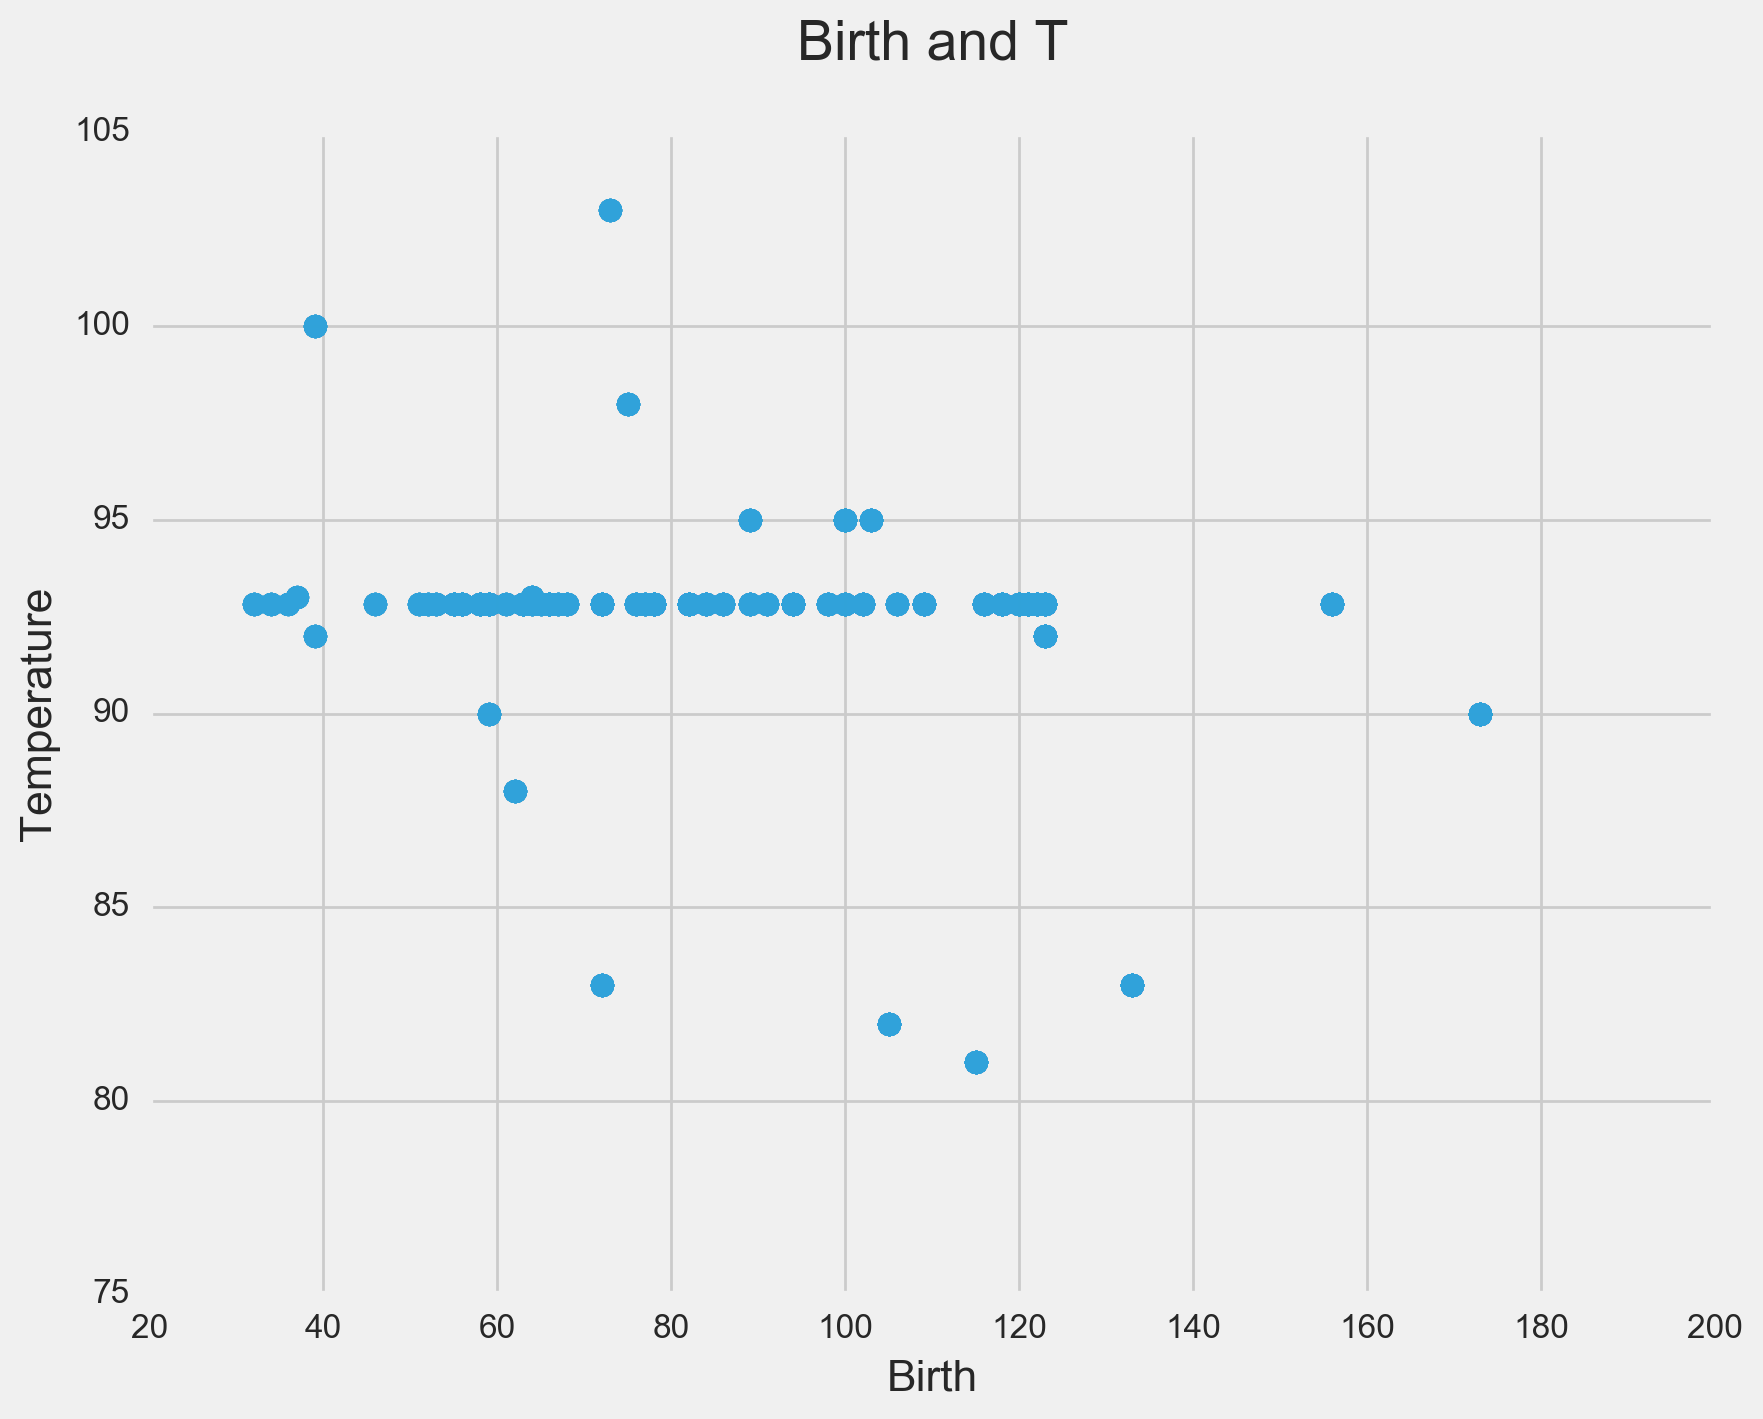

In [109]:
#Note that mean values were used to replace missing values
fig = plt.figure(figsize=(9,7))
ax = fig.gca()

ax = sns.regplot('Births', 'extremeT', data=dfA, fit_reg=False, scatter_kws={'s':70}, ax=ax)
ax.set_ylabel('Temperature', fontsize=16)
ax.set_xlabel('Birth', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('Birth and T\n', fontsize=20)

plt.show()

# Models
Simple regression model will be run because the Beta I am interested in is the temperature. 

In [37]:
#But before that I am running a simple regression to see significance of B Temp coefficient
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

## Defining y and X
y, X = patsy.dmatrices("lnBirths~ extremeT", data=dfA, return_type="dataframe")
y = np.ravel(y)
print (y.shape) 
print (X.shape)

(1913,)
(1913, 2)


In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

(1339, 2) (574, 2) (1339,) (574,)


In [39]:
# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain, ytrain)

In [40]:
#R^2 shows poor explanatory power and the coeficient shows that each additional increase in temperature will reduce
#birth rate by 2.6%. Additional features to will be added to the model to evaluate the explanatory power of the model. 
print ("R^2:", model.score(Xtrain, ytrain))
print ("Coefficients:", model.coef_)
print ("Intercept:", model.intercept_)

('R^2:', 0.051796246096763587)
('Coefficients:', array([ 0.        , -0.02539944]))
('Intercept:', 6.7533739353391447)


In [41]:
import statsmodels.formula.api as smf
lm_stats = smf.ols(formula='lnBirths ~ extremeT', data=dfA).fit()
print lm_stats.summary()
#The simple regression model shows that with each additional increase in temperature will negatively impact birth rate 
#by 2%. But the explanatory power of this model at 5.8%. But the model can be improved with the following model. 

                            OLS Regression Results                            
Dep. Variable:               lnBirths   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     117.4
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           1.34e-26
Time:                        20:26:56   Log-Likelihood:                -708.34
No. Observations:                1913   AIC:                             1421.
Df Residuals:                    1911   BIC:                             1432.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.8685      0.226     30.344      0.0

In [42]:
   #X = [extremeT, yrsofedu, age, religion_type, work_type, b_control]
    #y = lnBirths
#Linear regression model with additional variables
y1, X1 = patsy.dmatrices("lnBirths ~  extremeT+ yrsofedu+ age+ religion_type+ work_type+ b_control+household_location+abortion", data=dfA, return_type="dataframe")
y1 = np.ravel(y1)
print (y1.shape)
print ("\n=====\n")
print (X1.shape)

(1913,)

=====

(1913, 9)


In [43]:
X1train, X1test, y1train, y1test = train_test_split(X1, y1, test_size=0.30)
print ("Shape of X train:", X1train.shape) 
print ("Shape of y train:", y1train.shape)
print ("\n=====\n")
print ("Shape of X test:", X1test.shape)
print ("Shape of y test:", y1test.shape)

('Shape of X train:', (1339, 9))
('Shape of y train:', (1339,))

=====

('Shape of X test:', (574, 9))
('Shape of y test:', (574,))


In [44]:
#This model with additional variables only increase the R^2 to 6.9%
#But we do have significant results for extremeT and age at 5% significance level. 
#The model shows multicollinearity.
lm_stats_1 = smf.ols(formula='lnBirths ~  extremeT+ yrsofedu + age+ religion_type+ work_type+ b_control+ household_location +abortion', data=dfA).fit()
print (lm_stats_1.summary())

                            OLS Regression Results                            
Dep. Variable:               lnBirths   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     17.53
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           2.02e-25
Time:                        20:26:56   Log-Likelihood:                -697.41
No. Observations:                1913   AIC:                             1413.
Df Residuals:                    1904   BIC:                             1463.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              7.0079      0

In [45]:
#Multicollinearity test. Multicolliearity index is very high. 
np.linalg.cond(lm_stats.model.exog)

2605.7929559858553

In [46]:
#Will be using cross validation to resolve the multicollinearity
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [47]:
#Normalizing 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
Xn = ss.fit_transform(X)

In [48]:
from sklearn.cross_validation import train_test_split
X1train, Xtest, y1train, ytest = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X1train.shape, Xtest.shape
print "\n======\n"
print y1train.shape, ytest.shape

(1339, 2) (574, 2)


(1339,) (574,)


In [49]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X1train, y1train)

print (optimal_ridge.alpha_) #optimal alpha

40.5546073584


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X1train, y1train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [52]:
def rsquare_meansquare_error(y1train, ytest, X1train, Xtest, test, best_model):
    y_train_pred = best_model.predict(X1train)
    y_test_pred = best_model.predict(Xtest)
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(y1train, y_train_pred),
        mean_squared_error(ytest, y_test_pred)))
    
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(y1train, y_train_pred),
        r2_score(ytest, y_test_pred)))

In [53]:
#Evaluating performance of my model for OLS
rsquare_meansquare_error(y1train, ytest, X1train, Xtest, "OLS", lr)

MSE OLS train data: 0.13, test data: 0.12
R^2 OLS train data: 0.05, test data: 0.08


In [54]:
# Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(X1train, y1train) #regression fit

Ridge(alpha=40.554607358408298, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [55]:
rsquare_meansquare_error(y1train, ytest, X1train, Xtest, "Ridge", ridge)

MSE Ridge train data: 0.13, test data: 0.12
R^2 Ridge train data: 0.05, test data: 0.07


In [56]:
# Lasso Regression
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X1train, y1train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000946614815384


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [57]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(X1train, y1train)

Lasso(alpha=0.00094661481538407073, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
#Lasso result is still the same witj ridge and OLS
rsquare_meansquare_error(y1train, ytest, X1train, Xtest, "Lasso", lasso)

MSE Lasso train data: 0.13, test data: 0.12
R^2 Lasso train data: 0.05, test data: 0.07


In [59]:
# Elastic Net
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X1train, y1train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0350538053062
0.01


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [60]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet.fit(X1train, y1train)

ElasticNet(alpha=0.035053805306173941, copy_X=True, fit_intercept=True,
      l1_ratio=0.01, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [61]:
#Same result. For this model OLS can perform as good as any other models. 
rsquare_meansquare_error(y1train, ytest, X1train, Xtest, "Elastic Net", enet)

MSE Elastic Net train data: 0.13, test data: 0.12
R^2 Elastic Net train data: 0.05, test data: 0.07


# Random Regression Tree
Random regression tree is better than regression tree

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)
estimator_rfr.fit(X1train, y1train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   12.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [80]:
#Best score for random forest
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 5}


best score 0.135264439913


In [81]:
#After evaluation, I found that random forest random forest performs better. 
rsquare_meansquare_error(y1train, ytest, X1train, Xtest,"Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.11, test data: 0.10
R^2 Random Forest Regression tree train data: 0.16, test data: 0.18


In [95]:
def location(x):
    if x == 0:
        return 0
    else:
        return 1
    
dfA['hh_location'] = dfA.household_location.map(location)
dfA.head(5)

,Births,Breastfeeding_in_months,Conception,Highest_class_grade_child,Marriage_age_mom,Prolonged_labour,Sex of child,abortion,age,age2,...,month_dta,nmbrbirths,nmbrkids,nmbrofwomen,v206,year,yrsofedu,religion_type,work_type,hh_location
4,78,13.0,2,1.00000,11.0,0,1,0,15,225,...,11,6,5,1,0,93,3.19347,1,1,0
13,82,30.0,2,4.92692,11.0,0,0,0,20,400,...,11,5,4,1,1,95,3.19347,1,1,0
14,122,30.0,2,5.00000,13.0,0,0,0,20,400,...,11,5,4,1,1,91,3.19347,1,1,0
15,173,2.0,2,4.92692,19.0,0,0,0,16,256,...,11,4,4,1,0,90,3.19347,1,1,0
16,173,18.0,2,9.00000,8.0,1,0,0,16,256,...,11,6,5,1,0,90,3.00000,1,1,0


In [96]:
dfA.isnull().sum() #making sure that there is no missing values for hh_location

Births                         0
Breastfeeding_in_months        0
Conception                     0
Highest_class_grade_child      0
Marriage_age_mom               0
Prolonged_labour               0
Sex of child                   0
abortion                       0
age                            0
age2                           0
b_control                      0
bidx                           0
birthcntrl                     0
bord                           0
cm                             0
contraception1                 0
education                      0
education1                     0
edustatus                      0
electricity                   10
extremeT                       0
hh_id                          0
hh_yrsofedu                    0
hhoccupation                   1
hhsize                         0
household_location             0
kg                             0
literacy                       7
livingkids                     0
lnBirths                       0
location  

In [105]:
# Here I am trying to compare and contrast regression tree and random forest. I am assuming that random forest will perform better. 
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,4,5],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [3,4],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
tree_gs = GridSearchCV(tree, params, n_jobs=-1, cv=5, verbose=1)
tree_gs.fit(X1train, y1train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [3, 4], 'criterion': ['mse'], 'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [106]:
#Best score for regression tree performs better than RFR
tree_best = tree_gs.best_estimator_ 

print "best estimator", tree_best
print "\n==========\n"
print "best parameters",  tree_gs.best_params_
print "\n==========\n"
print "best score", tree_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 3, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 1}


best score 0.152635406237


In [107]:
#Random regression regularization process is better than random forest. 
rsquare_meansquare_error(y1train, ytest, X1train, Xtest, "Regression tree", tree_best)

MSE Regression tree train data: 0.11, test data: 0.10
R^2 Regression tree train data: 0.17, test data: 0.19


# Principal Component Analysis=> To be erased

On my previous modeling I added several other features to improve the model but the improvement was marginal.Upon running random forest and regression tree; I came to find that regression tree marginally performed better than other regularization. Therefore in this section I will be jumping to PCA. 

In [113]:
#not sure if binary variables should be included????
#The variables will be compared to lnBirths
demo = dfA[['extremeT', 'yrsofedu', 'age', 'religion_type', 'work_type', 'b_control', 'household_location', 'abortion']]
demo = (demo - demo.mean()) / demo.std()

In [114]:
demo_corr = np.corrcoef(demo.values.T)
demo.corr()

,extremeT,yrsofedu,age,religion_type,work_type,b_control,household_location,abortion
extremeT,1.000000,-0.008929,0.021076,0.023668,0.021992,0.050979,-0.012636,-0.042375
yrsofedu,-0.008929,1.000000,0.064315,-0.027356,0.017691,-0.020824,0.030664,-0.062771
age,0.021076,0.064315,1.000000,0.105714,0.075116,-0.016099,0.158790,0.094892
religion_type,0.023668,-0.027356,0.105714,1.000000,0.058084,0.021689,0.051597,0.025935
work_type,0.021992,0.017691,0.075116,0.058084,1.000000,0.030788,0.122802,-0.021086
b_control,0.050979,-0.020824,-0.016099,0.021689,0.030788,1.000000,0.034867,0.042165
household_location,-0.012636,0.030664,0.158790,0.051597,0.122802,0.034867,1.000000,0.052163
abortion,-0.042375,-0.062771,0.094892,0.025935,-0.021086,0.042165,0.052163,1.000000


In [115]:
eig_vals, eig_vecs = np.linalg.eig(demo_corr)
print "Eigenvalues:\n" , eig_vals #variance amount
print "\n======\n"
print "Eigenvector Matrix:\n", eig_vecs #direction of coordinate space

Eigenvalues:
[ 1.3261784   0.78833769  0.84986862  0.92037044  0.96704339  0.98684539
  1.06969232  1.09166375]


Eigenvector Matrix:
[[ 0.05450372 -0.20526805  0.04145802  0.45878977  0.46877944  0.22746431
   0.68467766 -0.04909047]
 [ 0.09712234 -0.27627707  0.25045706 -0.36013584  0.45988841 -0.24963132
  -0.14322322 -0.65382385]
 [ 0.56410859  0.69362071 -0.02774902  0.11495308  0.33529424  0.16899755
  -0.20285446 -0.06749262]
 [ 0.36475406 -0.25116672 -0.01703652 -0.59937484 -0.07866796  0.62401623
   0.15607179  0.15616016]
 [ 0.40494104  0.03285531  0.57530421  0.16076288 -0.58069158 -0.13224712
   0.25960071 -0.2367258 ]
 [ 0.12677718  0.23144085 -0.0815256  -0.43833543  0.12108397 -0.59733451
   0.49754974  0.33548878]
 [ 0.54446469 -0.40310496 -0.62289618  0.21473866 -0.14486756 -0.26552046
  -0.08918472 -0.08666379]
 [ 0.24462436 -0.34670396  0.45702433  0.15249382  0.27800532 -0.15227881
  -0.34970427  0.60420262]]


In [117]:
#Here I will am calculating explained variance to see how much information is captured by each feature
exp_var = sorted( ((eig_vals) / (eig_vals.sum())* 100), reverse=True) 
exp_var

[16.577230017439888,
 13.645796870425416,
 13.371153970811287,
 12.335567376821844,
 12.088042343306579,
 11.504630482180112,
 10.623357795946756,
 9.8542211430681057]

In [119]:
cum_sum = np.cumsum(exp_var) #cumulative sum on given axis
cum_sum

array([ 16.57723002,  30.22302689,  43.59418086,  55.92974824,
        68.01779058,  79.52242106,  90.14577886, 100.        ])

In [122]:
#Creating projection matrix and sorting eigenvalues
vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
vector_pairs.sort(reverse=True)
vector_pairs

[[1.3261784013951914,
  array([ 0.05450372,  0.09712234,  0.56410859,  0.36475406,  0.40494104,
          0.12677718,  0.54446469,  0.24462436])],
 [1.0916637496340336,
  array([-0.04909047, -0.65382385, -0.06749262,  0.15616016, -0.2367258 ,
          0.33548878, -0.08666379,  0.60420262])],
 [1.0696923176649031,
  array([ 0.68467766, -0.14322322, -0.20285446,  0.15607179,  0.25960071,
          0.49754974, -0.08918472, -0.34970427])],
 [0.98684539014574779,
  array([ 0.22746431, -0.24963132,  0.16899755,  0.62401623, -0.13224712,
         -0.59733451, -0.26552046, -0.15227881])],
 [0.96704338746452656,
  array([ 0.46877944,  0.45988841,  0.33529424, -0.07866796, -0.58069158,
          0.12108397, -0.14486756,  0.27800532])],
 [0.92037043857440914,
  array([ 0.45878977, -0.36013584,  0.11495308, -0.59937484,  0.16076288,
         -0.43833543,  0.21473866,  0.15249382])],
 [0.84986862367574068,
  array([ 0.04145802,  0.25045706, -0.02774902, -0.01703652,  0.57530421,
         -0.081525

In [124]:
#Projection matrix weight
projection_matrix = np.hstack((vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print '2d PCA projection matrix:\n', projection_matrix

2d PCA projection matrix:
[[ 0.05450372 -0.04909047]
 [ 0.09712234 -0.65382385]
 [ 0.56410859 -0.06749262]
 [ 0.36475406  0.15616016]
 [ 0.40494104 -0.2367258 ]
 [ 0.12677718  0.33548878]
 [ 0.54446469 -0.08666379]
 [ 0.24462436  0.60420262]]


In [127]:
#Tranformation of matrix to z and creating PC1 and PC2
Z = demo.dot(projection_matrix)
Z.rename(columns={0: 'PC1', 1: 'PC2'}, inplace=True)
Z.head()

,PC1,PC2
4,-1.780079,0.757327
13,-1.067441,-0.030569
14,-1.067441,-0.030569
15,-1.888079,0.104561
16,-1.906270,0.227021


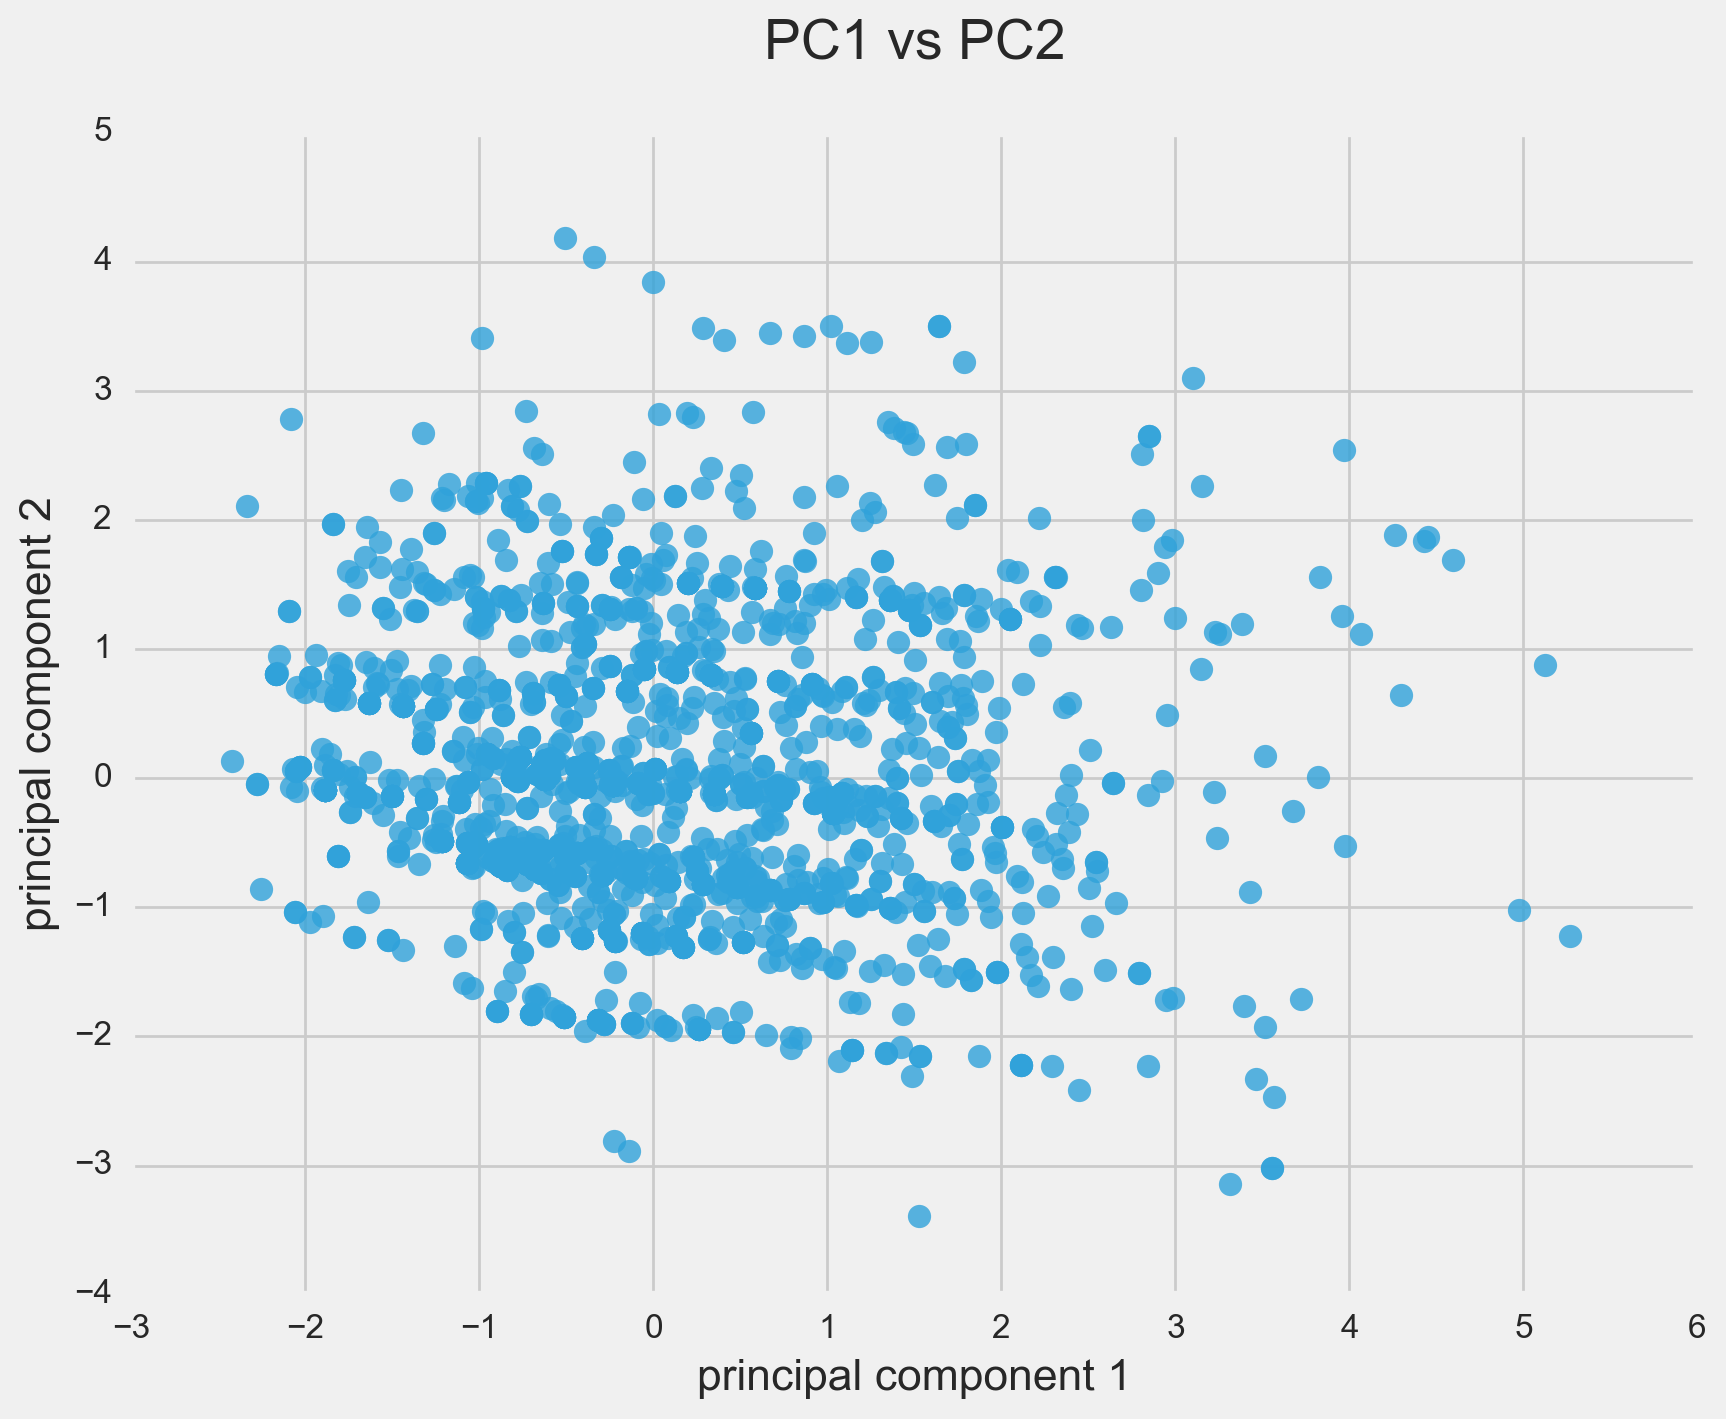

In [128]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.PC1, Z.PC2,
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

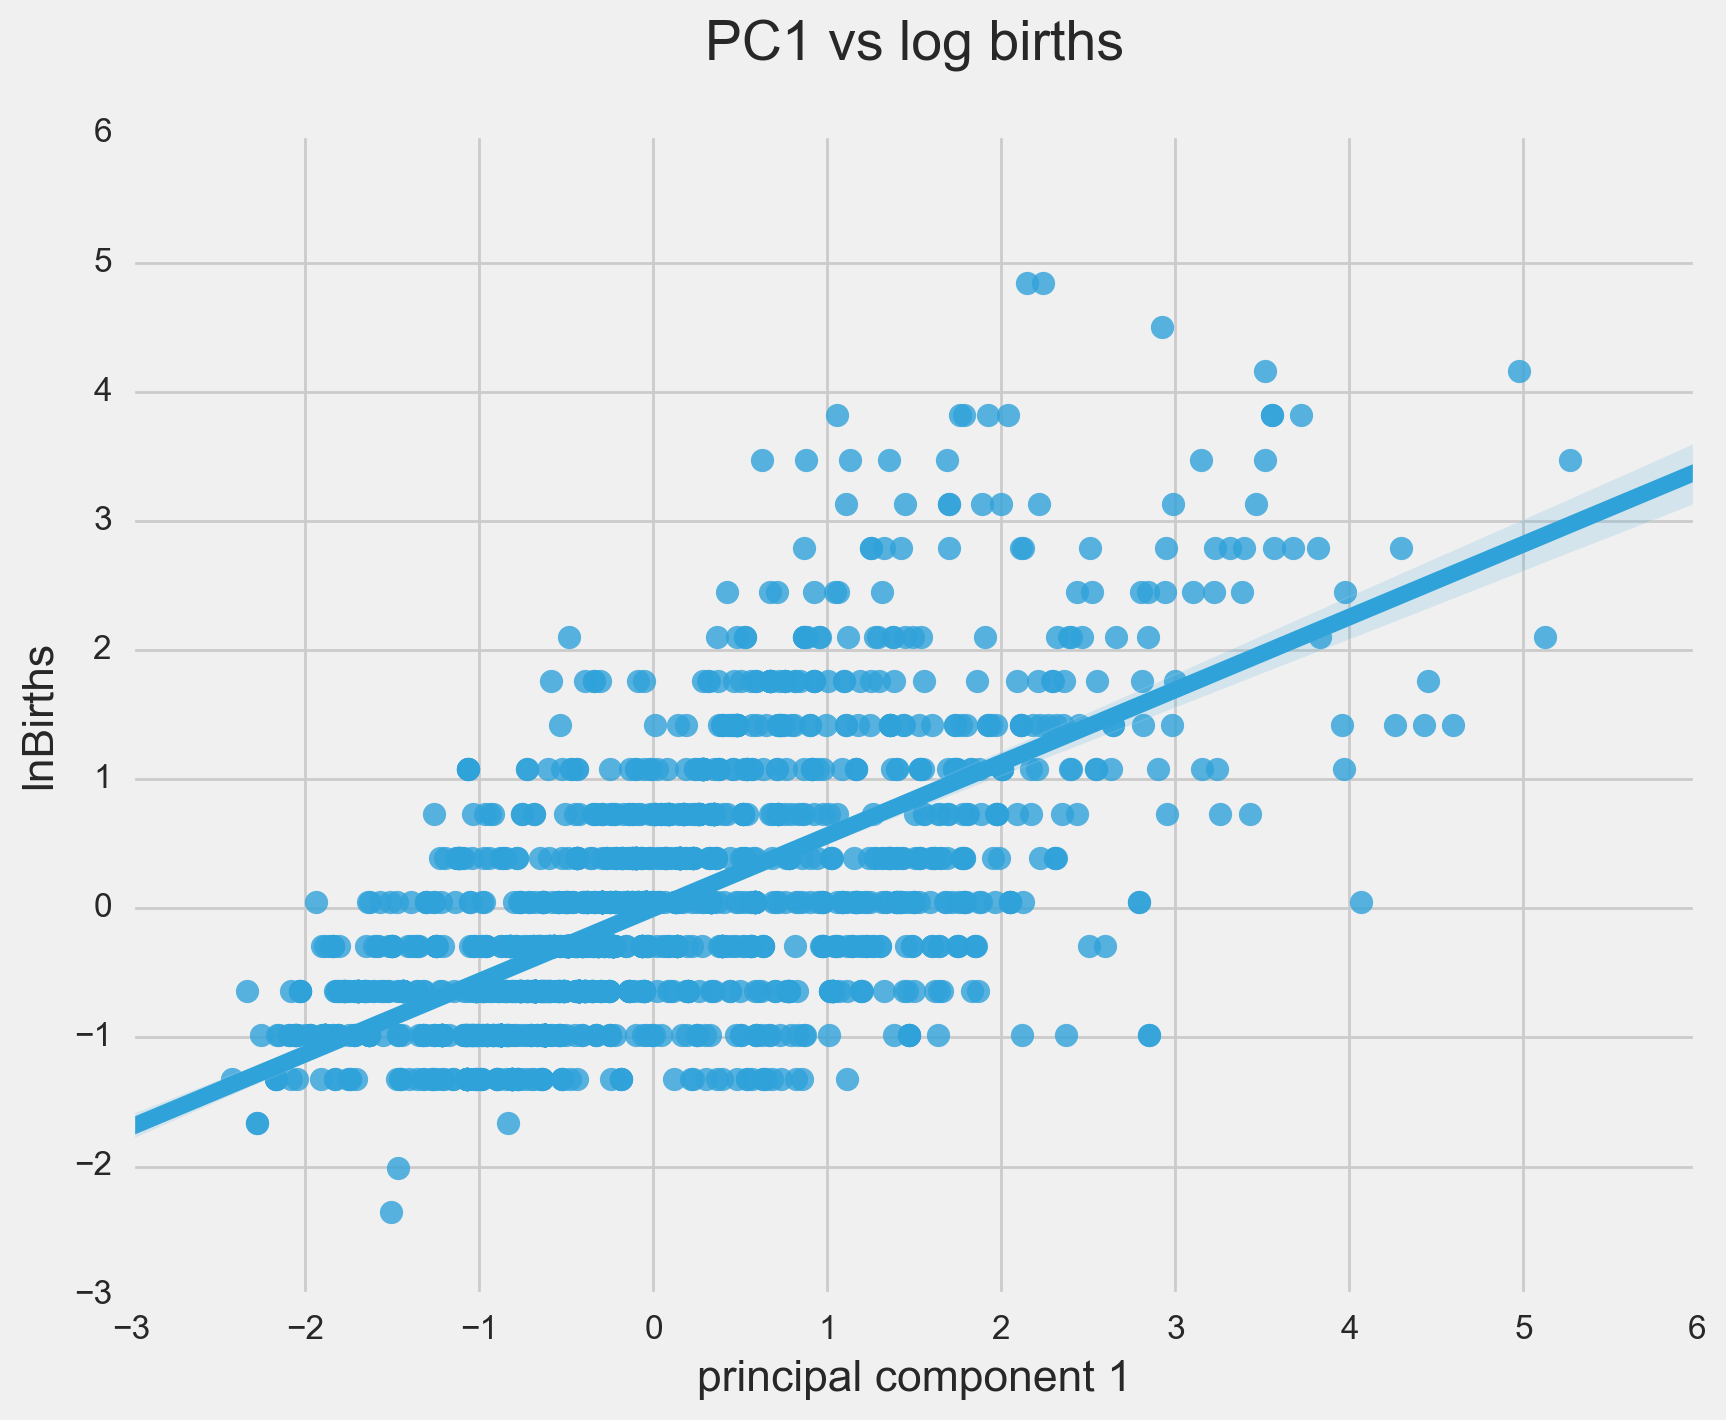

In [129]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.PC1, demo.age.values,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('lnBirths', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs log births\n', fontsize=20)

plt.show()

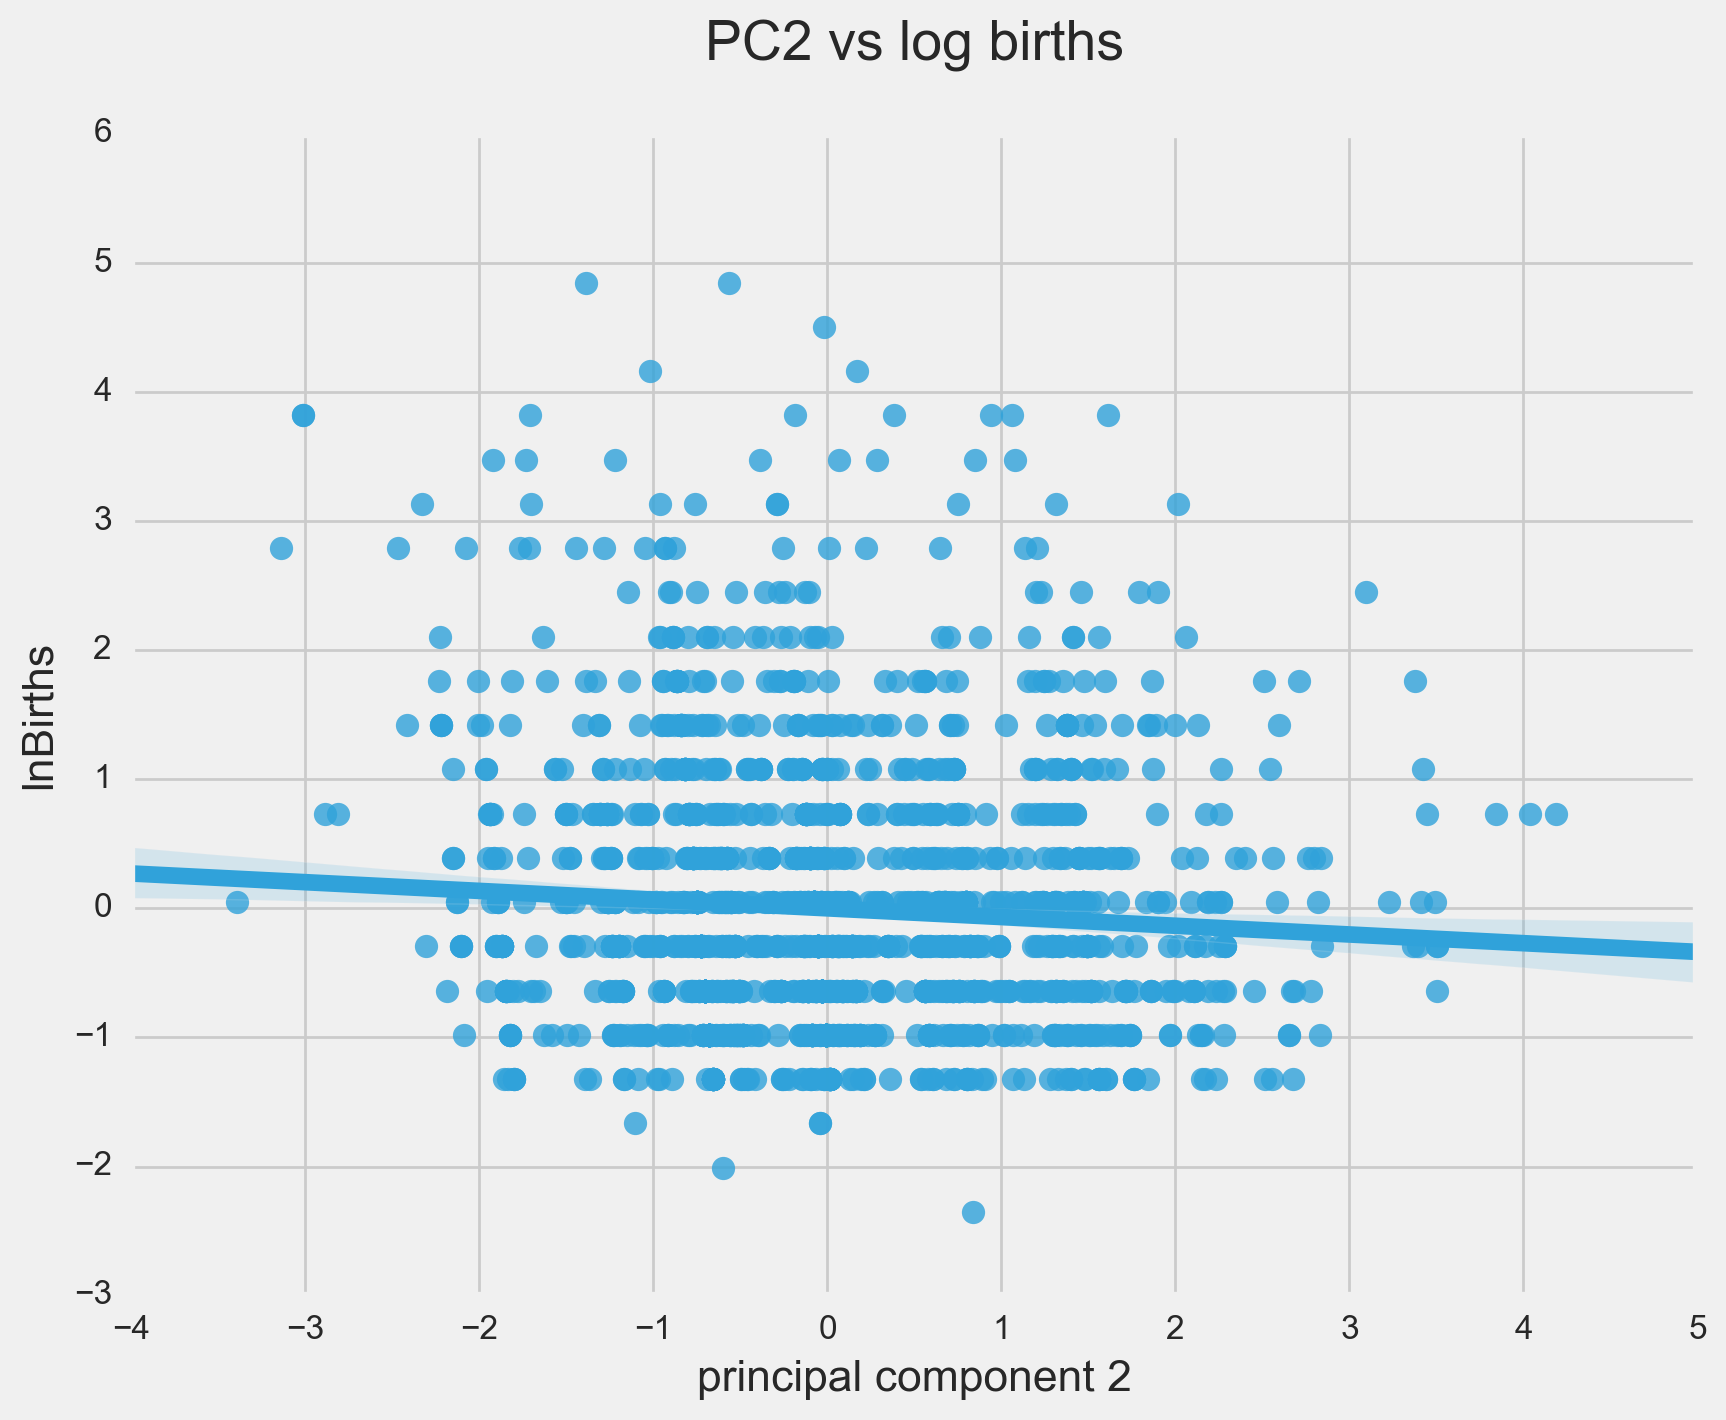

In [130]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.PC2, demo.age.values,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 2', fontsize=16)
ax.set_ylabel('lnBirths', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC2 vs log births\n', fontsize=20)

plt.show()